In [1]:
import pandas as pd
import pandas_datareader as pdr
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [14]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (50, 20),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large',
         'suptitle.labelsize':'xx-large'}
pylab.rcParams.update(params)

KeyError: 'suptitle.labelsize is not a valid rc parameter (see rcParams.keys() for a list of valid parameters)'

In [15]:
pylab.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
        

# Reading in the Data

I read in the two data sets, the Electricity metrics and the Steam metrics.

In [2]:
e = pd.read_csv('data/ConEd_Electric.csv', parse_dates=True)

In [3]:
s = pd.read_csv('data/ConEd_Steam.csv', parse_dates=True)

In [4]:
e.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81133 entries, 0 to 81132
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date_time    81133 non-null  object 
 1   consumption  81133 non-null  float64
 2   max_demand   81133 non-null  float64
 3   min_demand   81133 non-null  float64
 4   avg_demand   81133 non-null  float64
 5   temp         20274 non-null  float64
 6   humidity     20274 non-null  float64
dtypes: float64(6), object(1)
memory usage: 4.3+ MB


In [5]:
e.head() 
#Date time is set in 15 minute intervals, temp and humidity are taken in one hour intervals. Maybe make temp and humidity into its own csv?

date_time  consumption  max_demand  min_demand  avg_demand  \
0  01/01/2018 12:15:00 AM        430.0      1720.0      1720.0      1720.0   
1  01/01/2018 12:30:00 AM        420.0      1700.0      1700.0      1700.0   
2  01/01/2018 12:45:00 AM        440.0      1720.0      1720.0      1720.0   
3  01/01/2018 01:00:00 AM        420.0      1720.0      1720.0      1720.0   
4  01/01/2018 01:15:00 AM        420.0      1680.0      1680.0      1680.0   

   temp  humidity  
0   NaN       NaN  
1   NaN       NaN  
2   NaN       NaN  
3   9.0      56.1  
4   NaN       NaN

This is where i decided to either try to forcast the consumption or average demand.

# Electricity Data

Looking through the electricity data frame shows that there are gaps and really low/high values in the data. This will limit how much data i can use. Trying to decide between forcasting the Electricity Consumption or the Average electricity for the day. Also with the variables humidity and tempreture its in a different time frame so it needs to be changed.

In [17]:
#e_full = e[['date_time', 'avg_demand', 'consumption', 'temp', 'humidity']] #Reading in 
#e_full = e_full.set_index('date_time')
#e_full.index = pd.to_datetime(e_full.index)
#e_full.index = e_full.index.to_period('T')
#fig, ax = plt.subplots(figsize=(50, 20))
#plt.xlabel('Time')
#plt.ylabel('Average Demand')
#plt.title('Average Demand over Time')
#e_full['avg_demand'].plot()

# Average Electrical Power reading

Looking through the graphs for the avg electricity, its apparent that the cleanest data exists in 2018 and 2020.

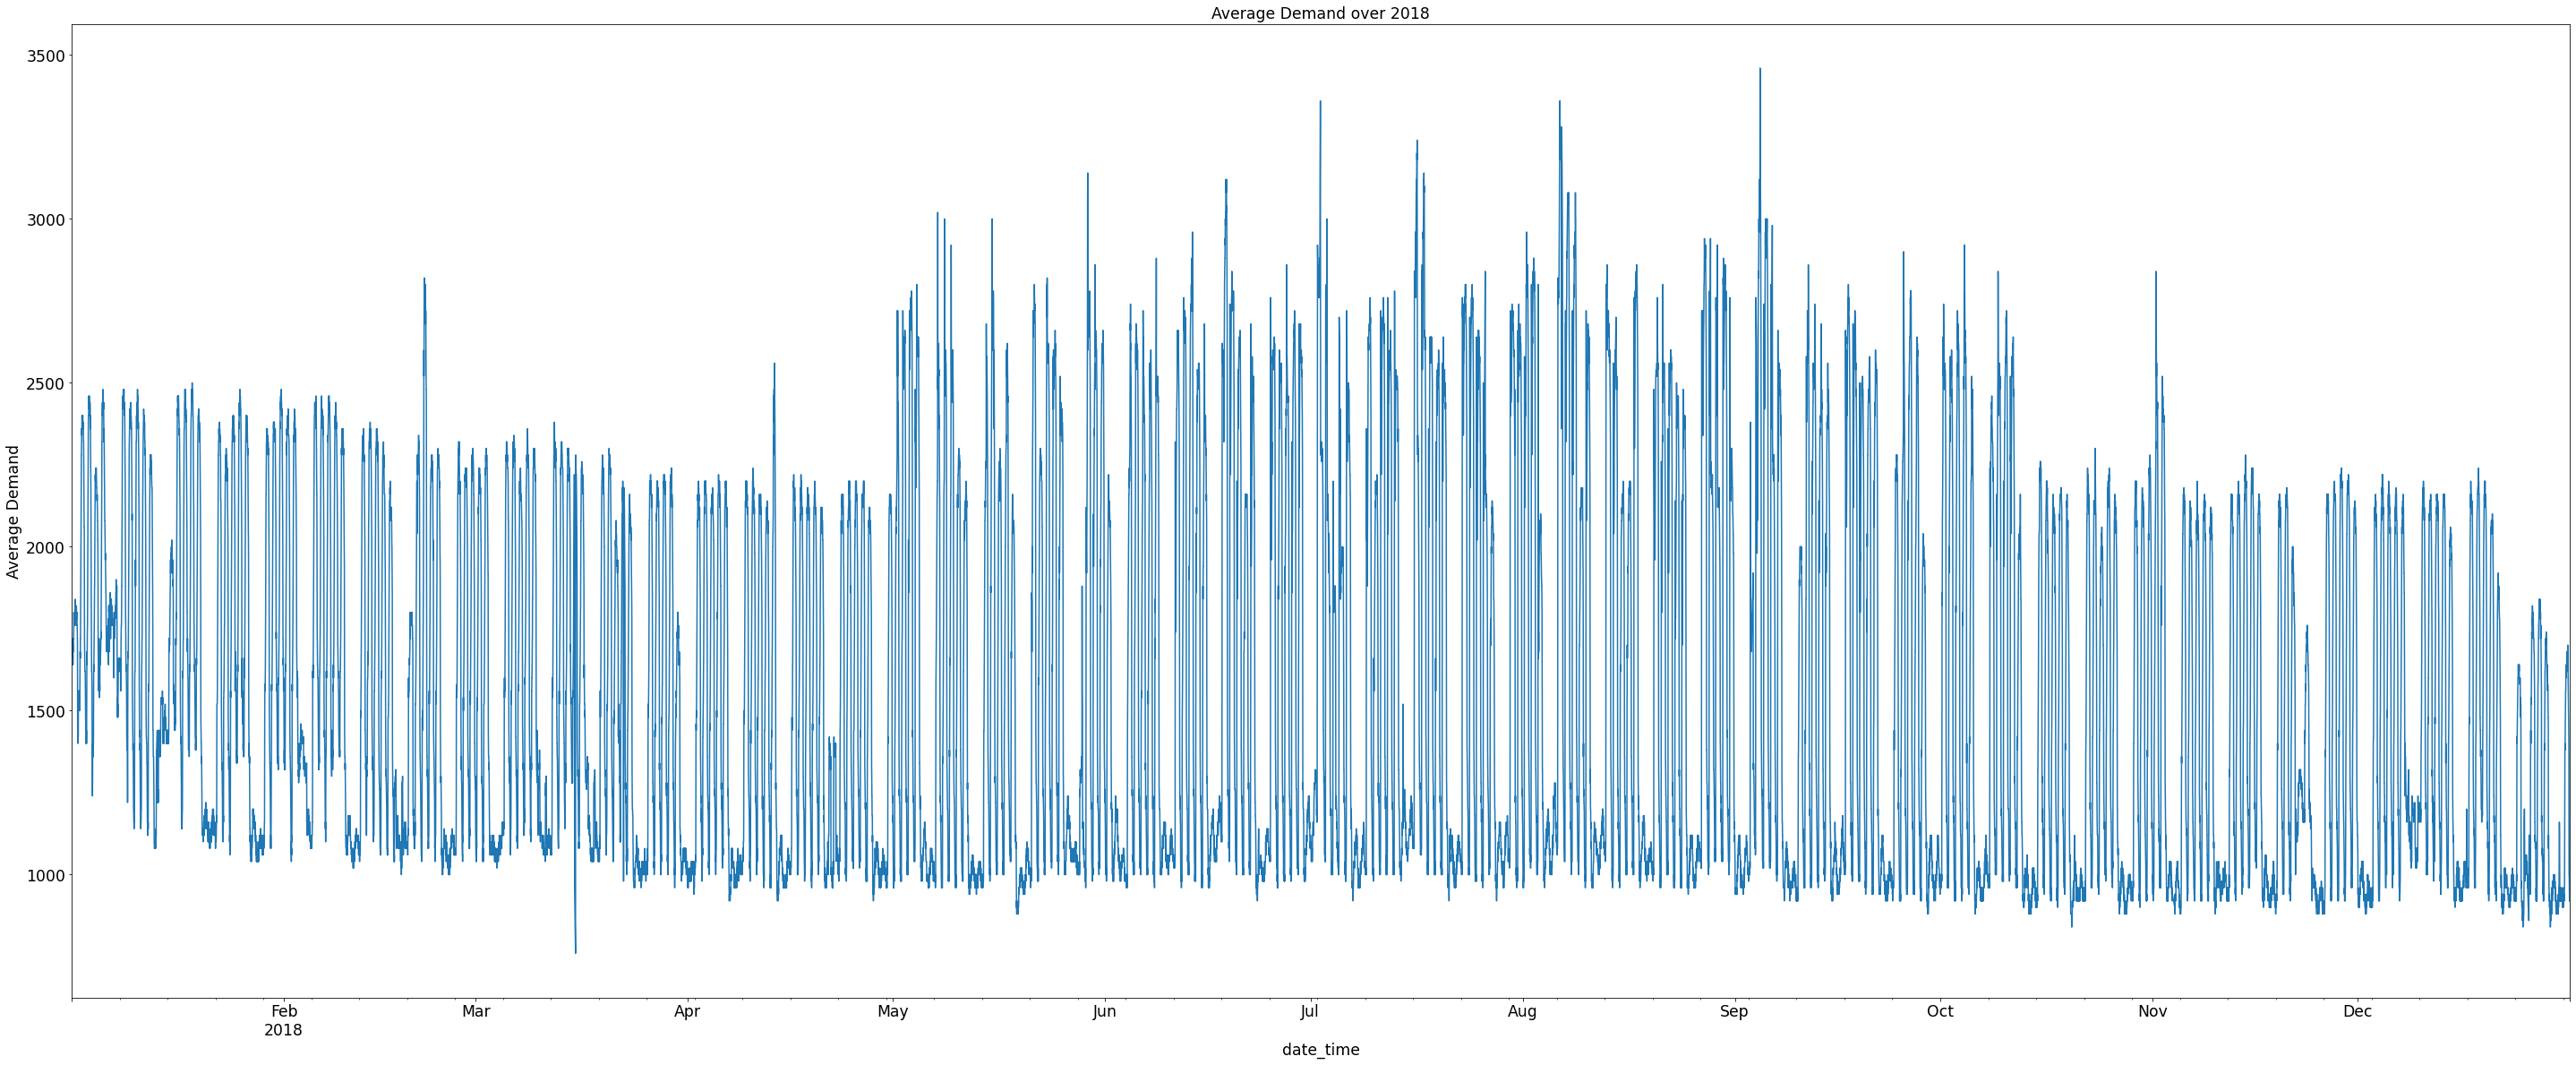

In [20]:
e_avg = e[['date_time', 'avg_demand']]
e_avg = e_avg[e_avg['avg_demand']>500]
e_avg['date_time'] = pd.to_datetime(e_avg['date_time'])
mask = e_avg['date_time'].dt.year == int(2018)
avg2018 = e_avg[mask]
avg2018 = avg2018.set_index('date_time')
avg2018.index = avg2018.index.to_period('T')
fig, ax = plt.subplots(figsize=(50, 20))
plt.xlabel('Year 2018')
plt.ylabel('Average Demand')
plt.title('Average Demand over 2018')
avg2018['avg_demand'].plot()
plt.savefig('Electricity2018.png')
#Checking the different years

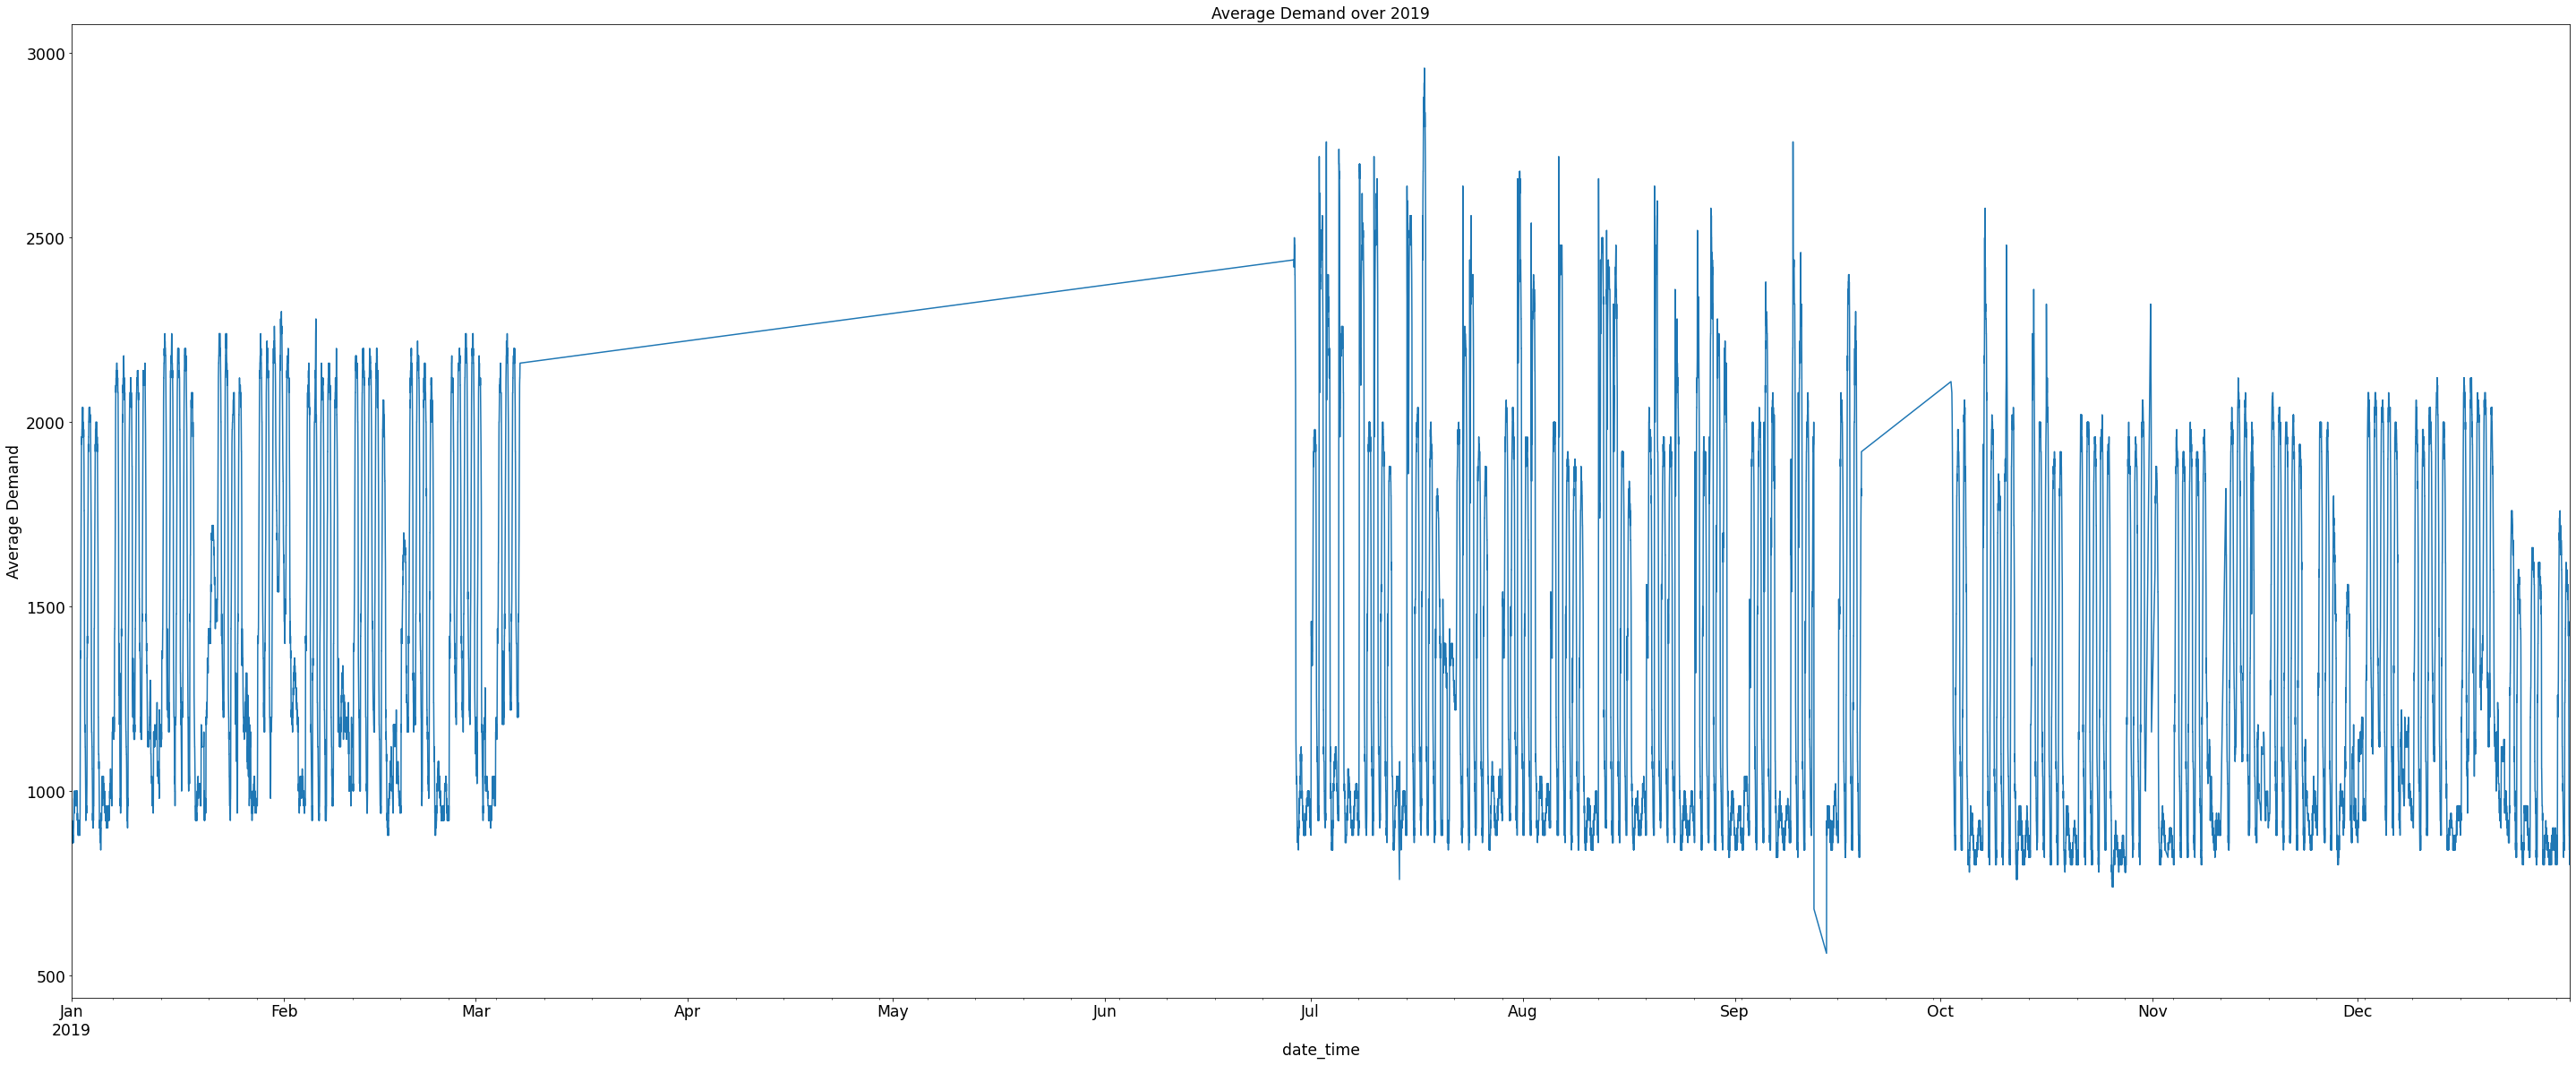

In [21]:
mask = e_avg['date_time'].dt.year == int(2019)
avg2019 = e_avg[mask]
avg2019 = avg2019.set_index('date_time')
avg2019.index = avg2019.index.to_period('T')
fig, ax = plt.subplots(figsize=(50, 20))
plt.xlabel('Year 2018')
plt.ylabel('Average Demand')
plt.title('Average Demand over 2019')
avg2019['avg_demand'].plot()
plt.savefig('Electricity2019.png')

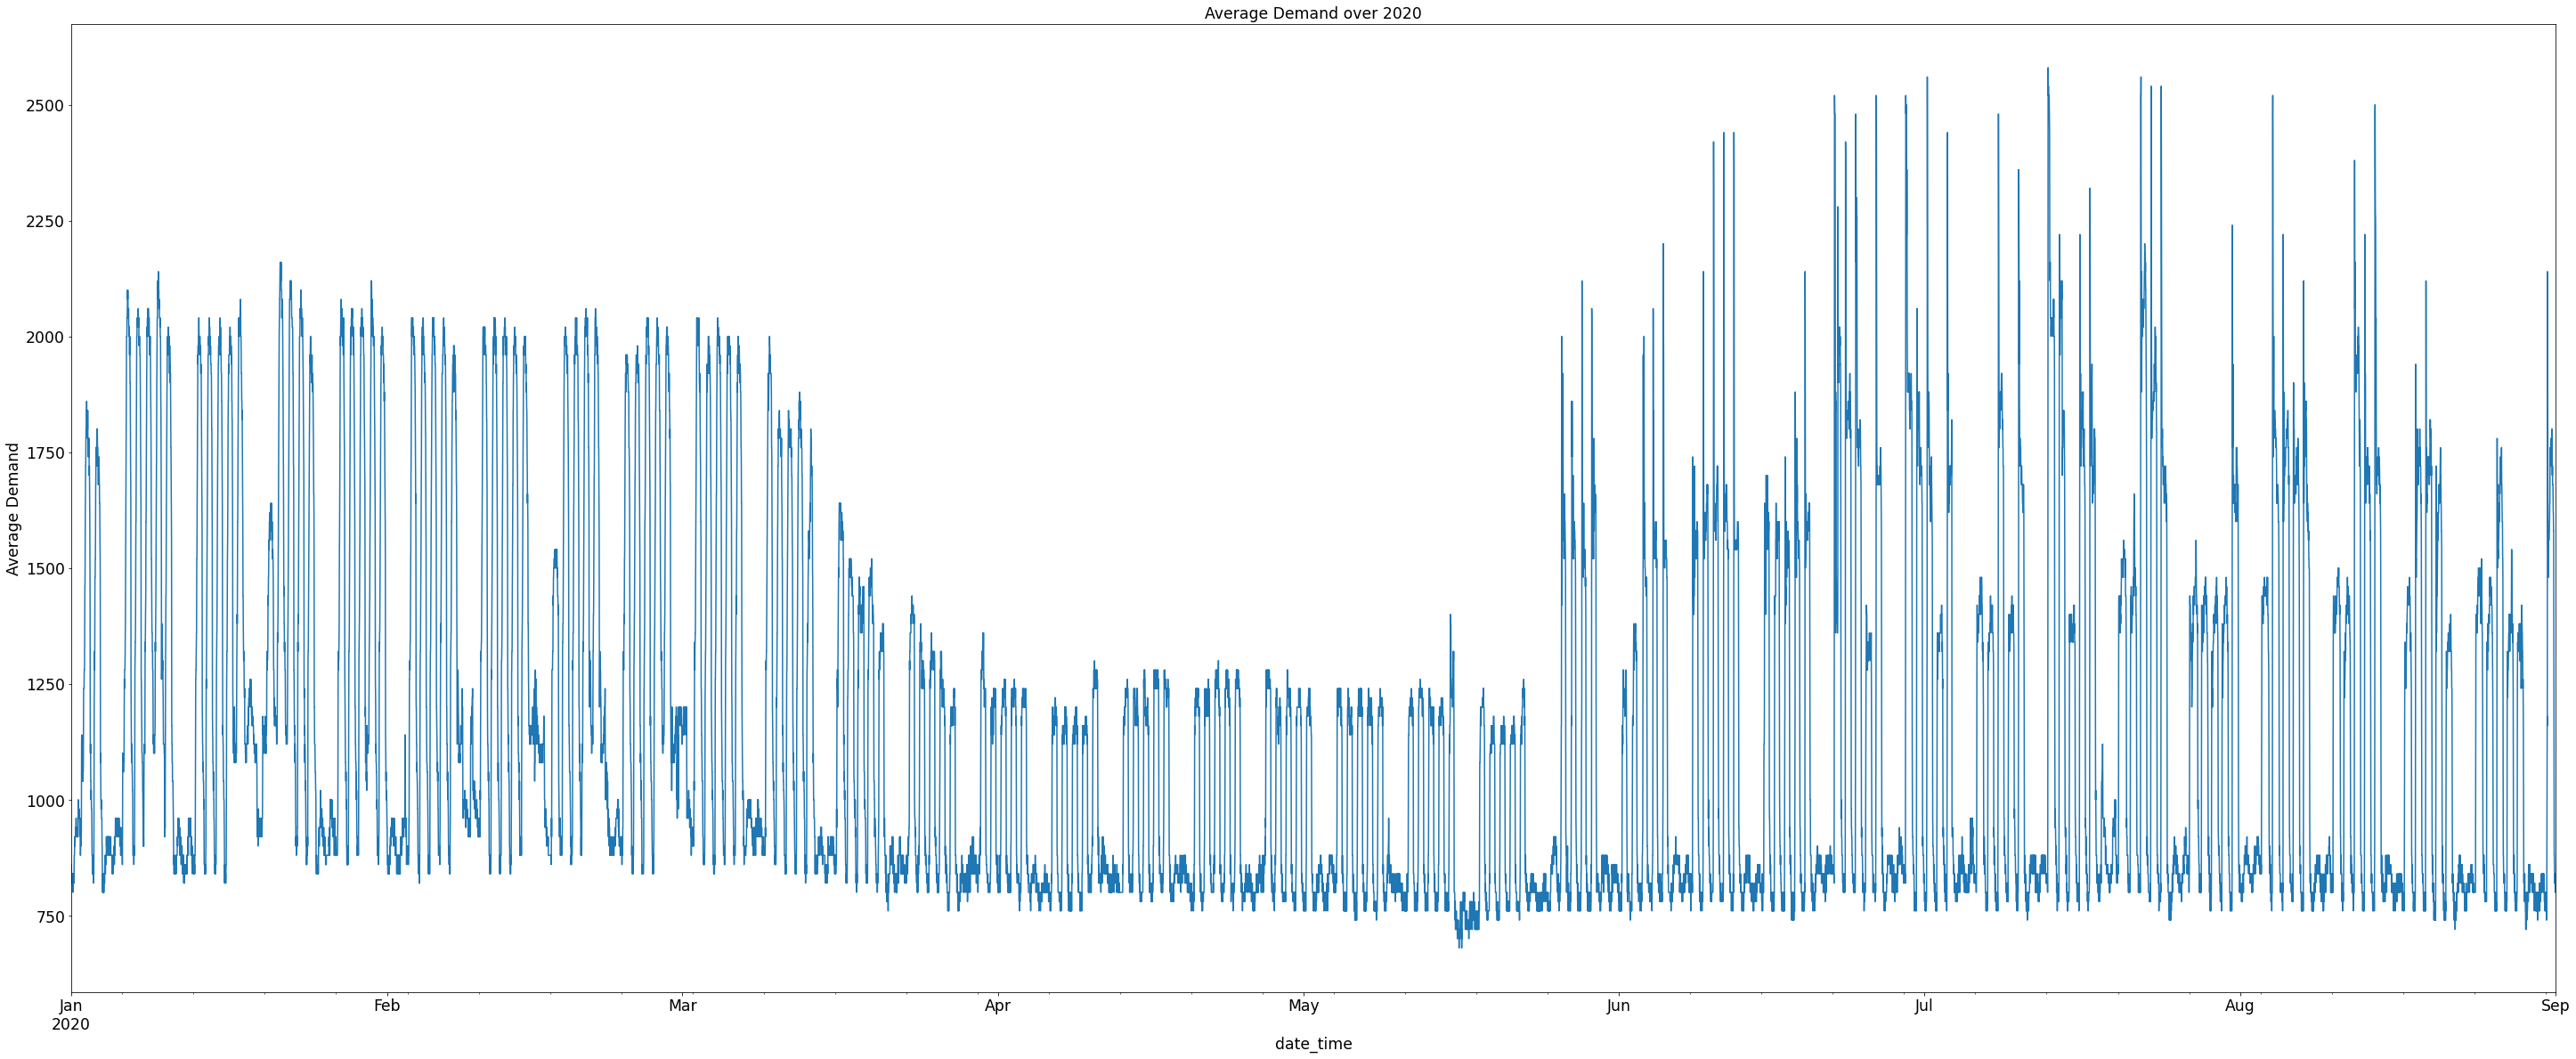

In [22]:
mask = e_avg['date_time'].dt.year == int(2020)
avg2020 = e_avg[mask]
avg2020 = avg2020.set_index('date_time')
avg2020.index = avg2020.index.to_period('T')
fig, ax = plt.subplots(figsize=(50, 20))
plt.xlabel('Year 2020')
plt.ylabel('Average Demand')
plt.title('Average Demand over 2020')
avg2020['avg_demand'].plot()
plt.savefig('Electricity2020.png')

# Consumption Data

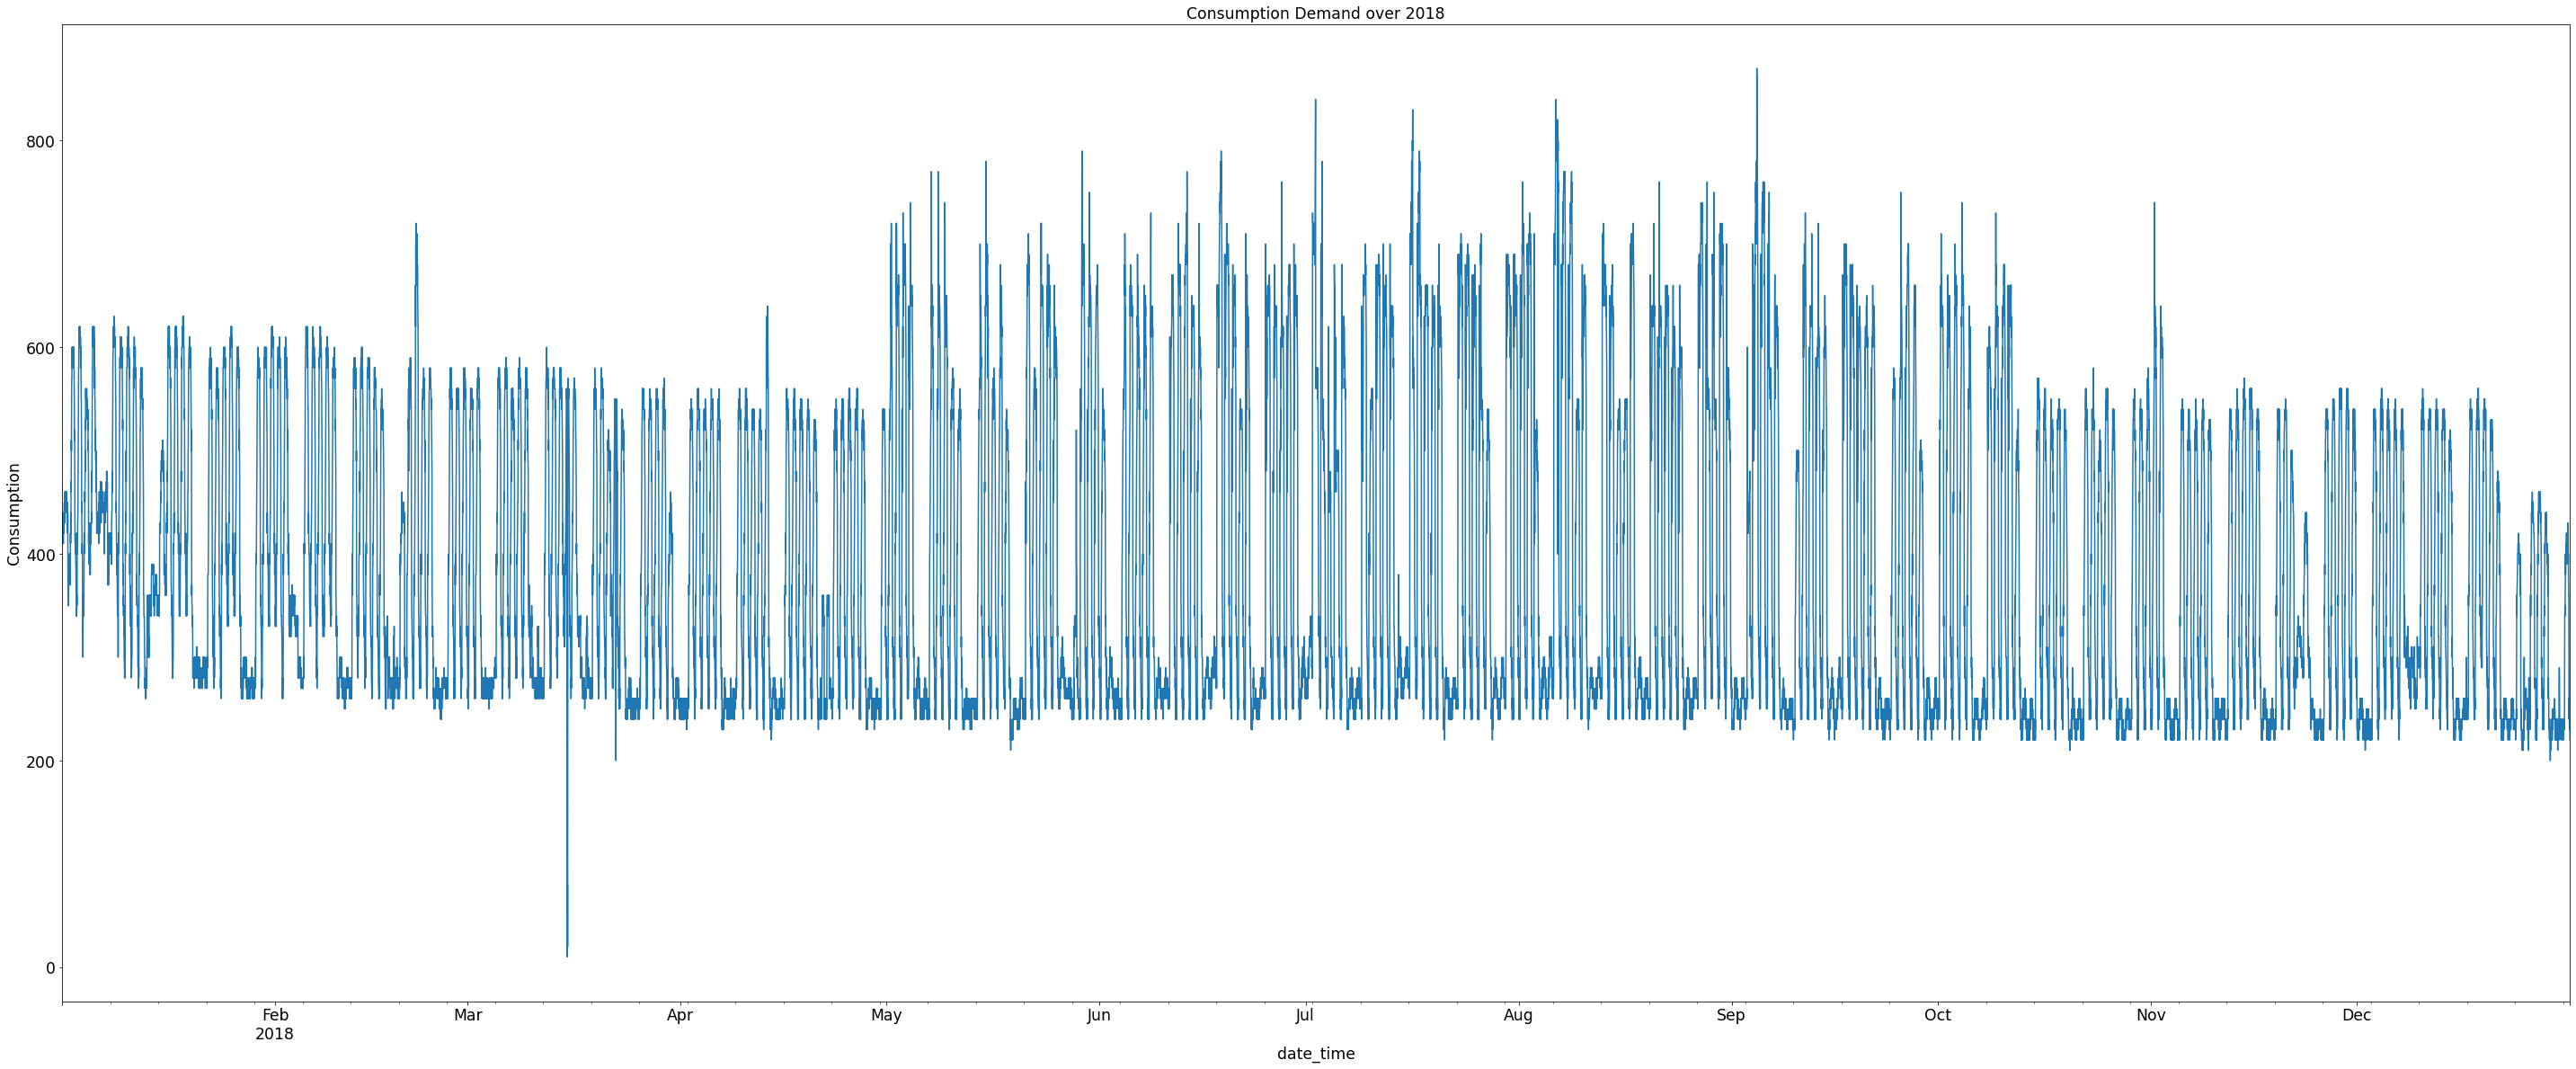

In [23]:
e_con = e[['date_time', 'consumption']]
e_con = e_con[e_con['consumption'] < 1000]
e_con = e_con[e_con['consumption'] > 0]
e_con['date_time'] = pd.to_datetime(e_con['date_time'])
mask2018 = e_con['date_time'].dt.year == int(2018)
con2018 = e_con[mask2018]
con2018 = con2018.set_index('date_time')
con2018.index = con2018.index.to_period('T')
fig, ax = plt.subplots(figsize=(50, 20))
plt.xlabel('Year 2020')
plt.ylabel('Consumption')
plt.title('Consumption over 2018')
con2018['consumption'].plot()
plt.savefig('Consumption2018.png')

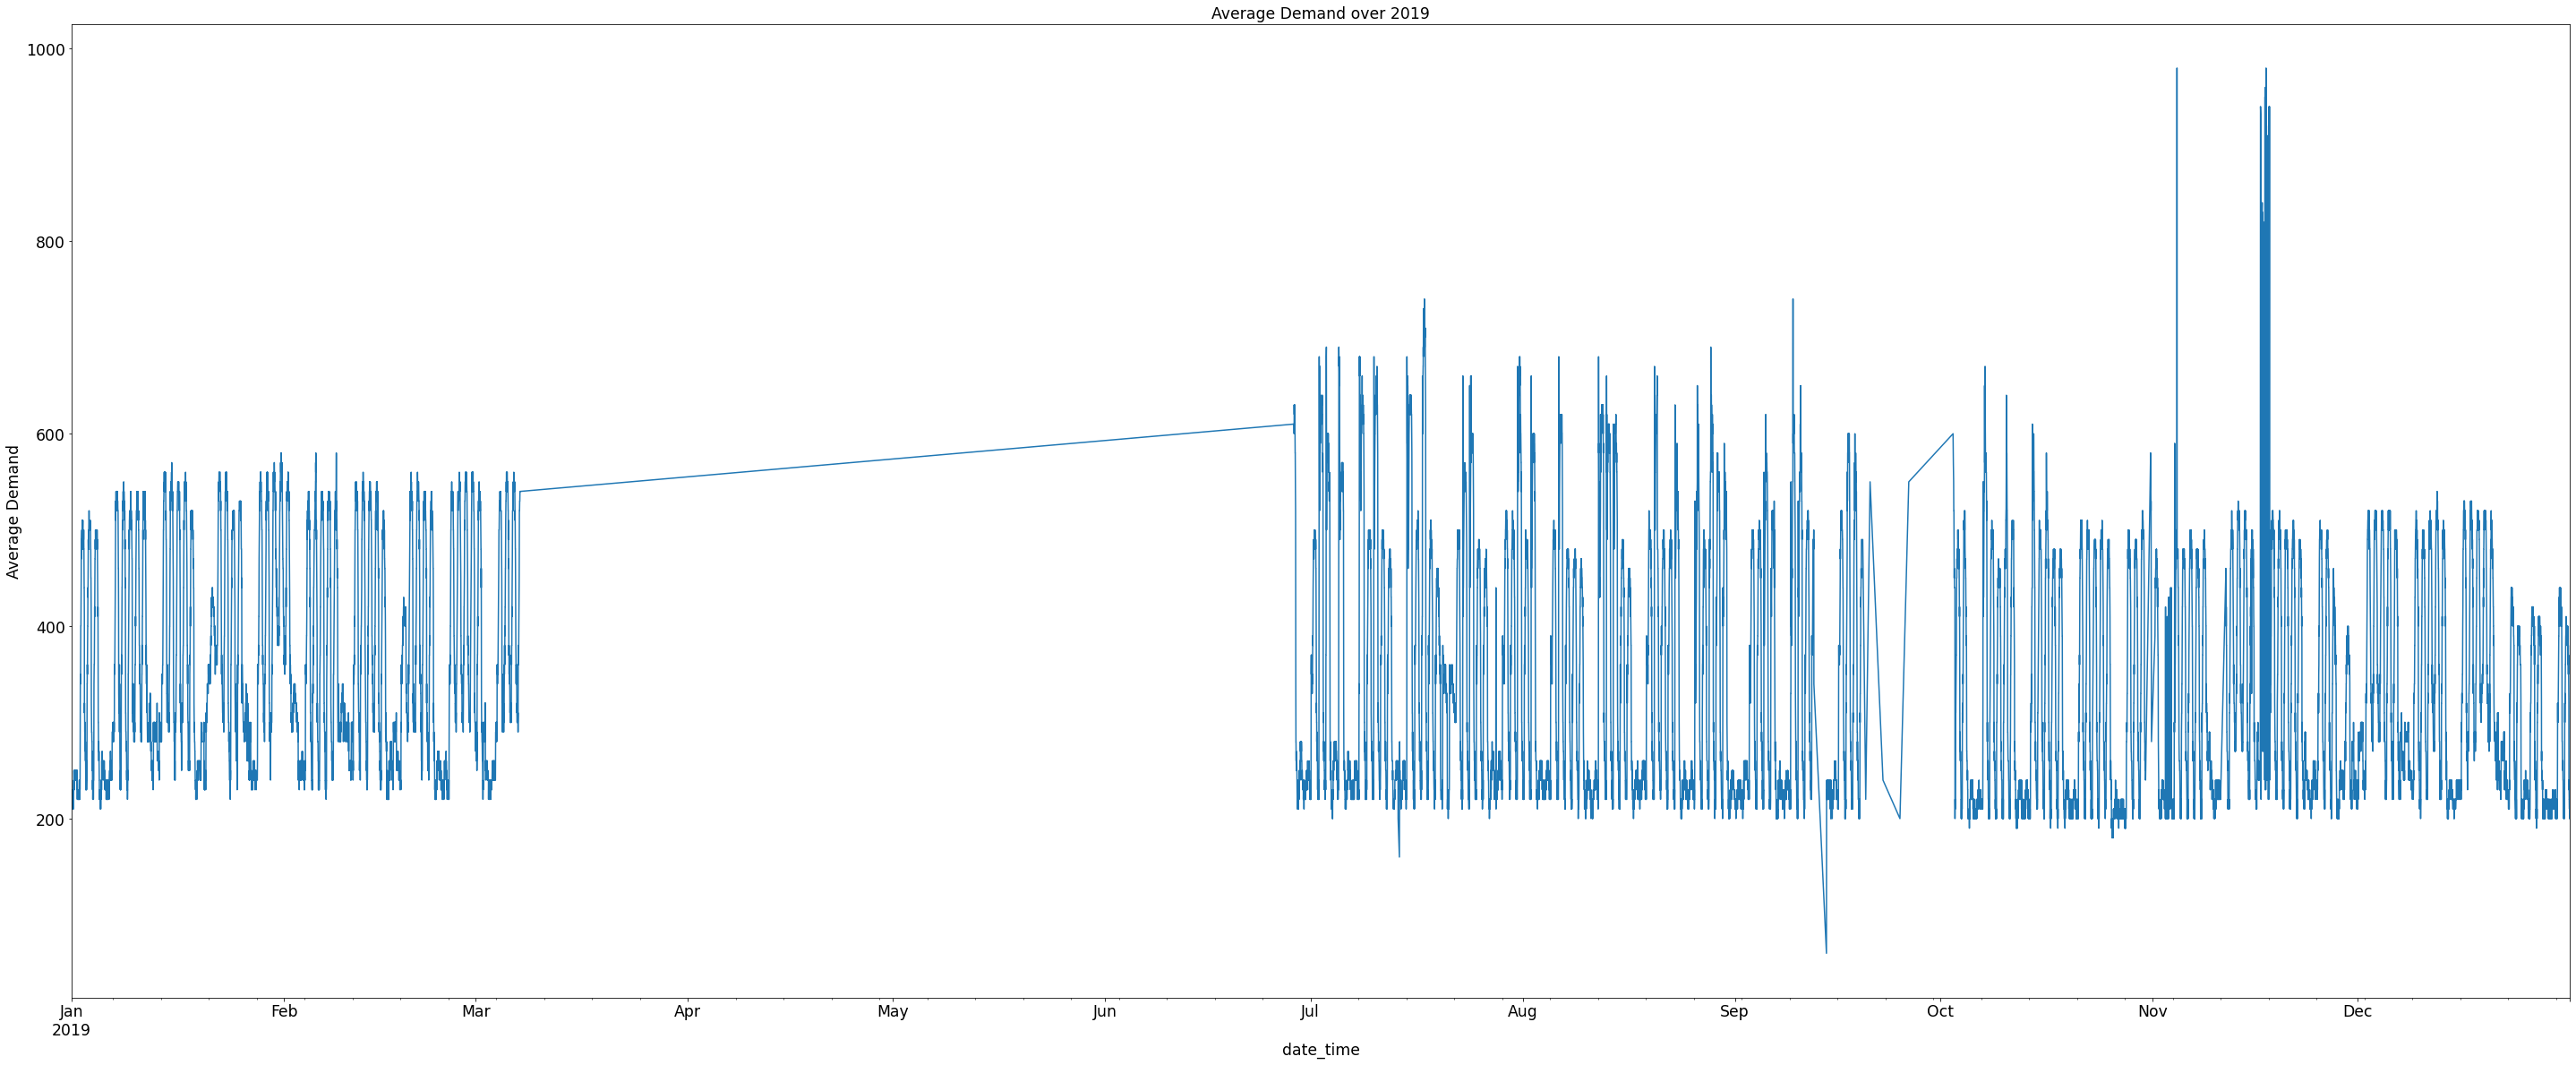

In [24]:
mask2019 = e_con['date_time'].dt.year == int(2019)
con2019 = e_con[mask2019]
con2019 = con2019.set_index('date_time')
con2019.index = con2019.index.to_period('T')
fig, ax = plt.subplots(figsize=(50, 20))
plt.xlabel('Year 2020')
plt.ylabel('Consumption')
plt.title('Consumption over 2019')
con2019['consumption'].plot()
plt.savefig('Consumption2019.png')

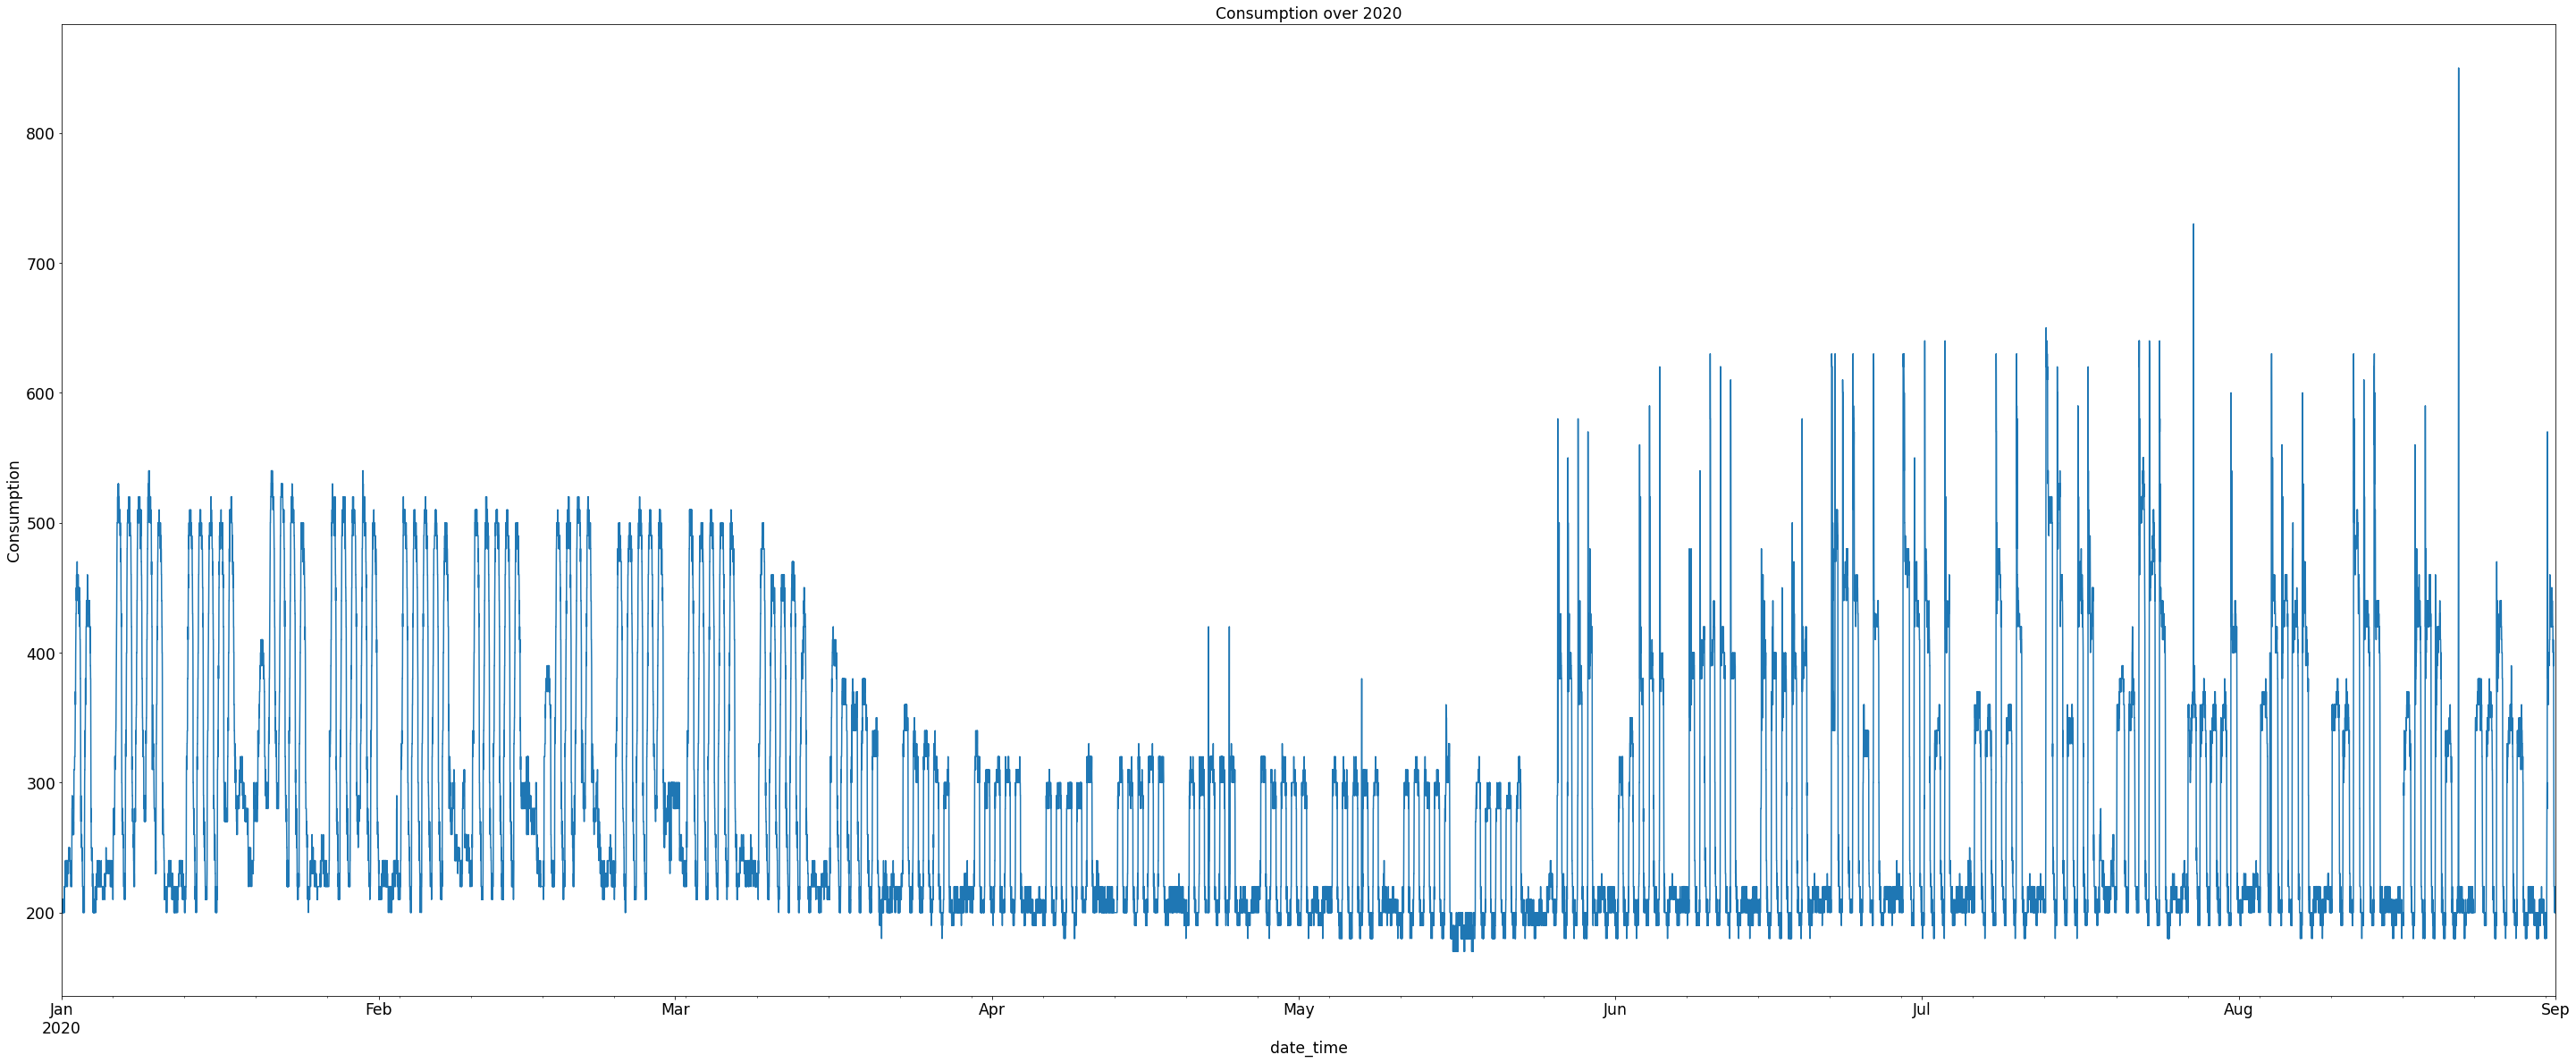

In [26]:
mask2020 = e_con['date_time'].dt.year == int(2020)
con2020 = e_con[mask2020]
con2020 = con2020.set_index('date_time')
con2020.index = con2020.index.to_period('T')
fig, ax = plt.subplots(figsize=(50, 20))
plt.xlabel('Year 2020')
plt.ylabel('Consumption')
plt.title('Consumption over 2020')
con2020['consumption'].plot()
plt.savefig('Consumption2020.png')

In [83]:
con2020.to_csv(r'data/2020consumption.csv')

# Steam Data

Looking at the steam data, Its not as clean as the Electricity data, especially in 2020. When considered to be used in the multivariate forcasting, i decided not to use it for this reason. 

In [41]:
s

avg_demand
date_time                      
2018-01-01 00:15:00     18700.0
2018-01-01 00:30:00     18560.0
2018-01-01 00:45:00     19660.0
2018-01-01 01:00:00     22020.0
2018-01-01 01:15:00     22640.0
...                         ...
2020-08-31 23:00:00         0.0
2020-08-31 23:15:00         0.0
2020-08-31 23:30:00         0.0
2020-08-31 23:45:00         0.0
2020-09-01 00:00:00         0.0

[91740 rows x 1 columns]

<ipython-input-52-537ba303b093>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sall['date_time'] = pd.to_datetime(sall['date_time'])


<AxesSubplot:xlabel='date_time'>

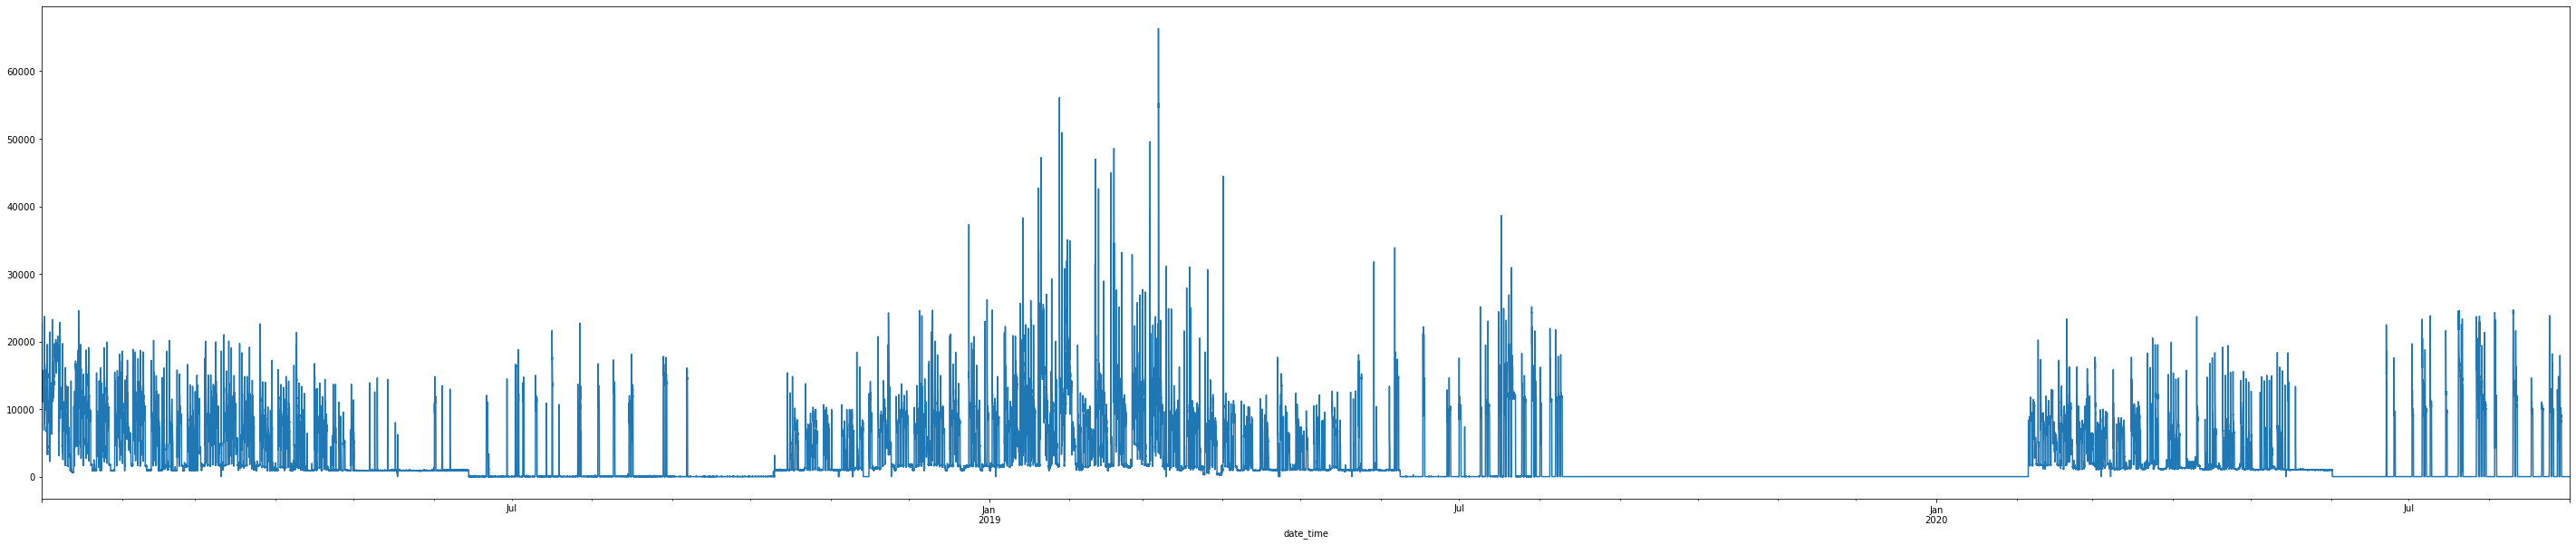

In [52]:
sall = s[['date_time', 'avg_demand']] 
sall['date_time'] = pd.to_datetime(sall['date_time'])
sall = sall.set_index('date_time')
sall.index = sall.index.to_period('T')
fig, ax = plt.subplots(figsize=(50, 20))
sall['avg_demand'].plot()

In [50]:
s

avg_demand
date_time                   
2018-01-01 00:15     18700.0
2018-01-01 00:30     18560.0
2018-01-01 00:45     19660.0
2018-01-01 01:00     22020.0
2018-01-01 01:15     22640.0
...                      ...
2020-08-31 23:00         0.0
2020-08-31 23:15         0.0
2020-08-31 23:30         0.0
2020-08-31 23:45         0.0
2020-09-01 00:00         0.0

[91740 rows x 1 columns]

# Occupancy, setting up multivariate forcasting

Trying to clean the data so every variable is on the same time series. With occupancy only having a certain amount of days from 3/9/2020 to 8/31/2020 with gaps for weekends. This limits the data very heavily, so we cant use the whole year for the more simpler models. Even for other variables such as the humidity and temp are taken at 3 hour intervals instead of the 15 minute intervals for the electricity. To handle i cut the main csv to be the same date range as the occupancy, while also changing the interval to days instead of minutes. This made it possible to run more intensive forcasting models.

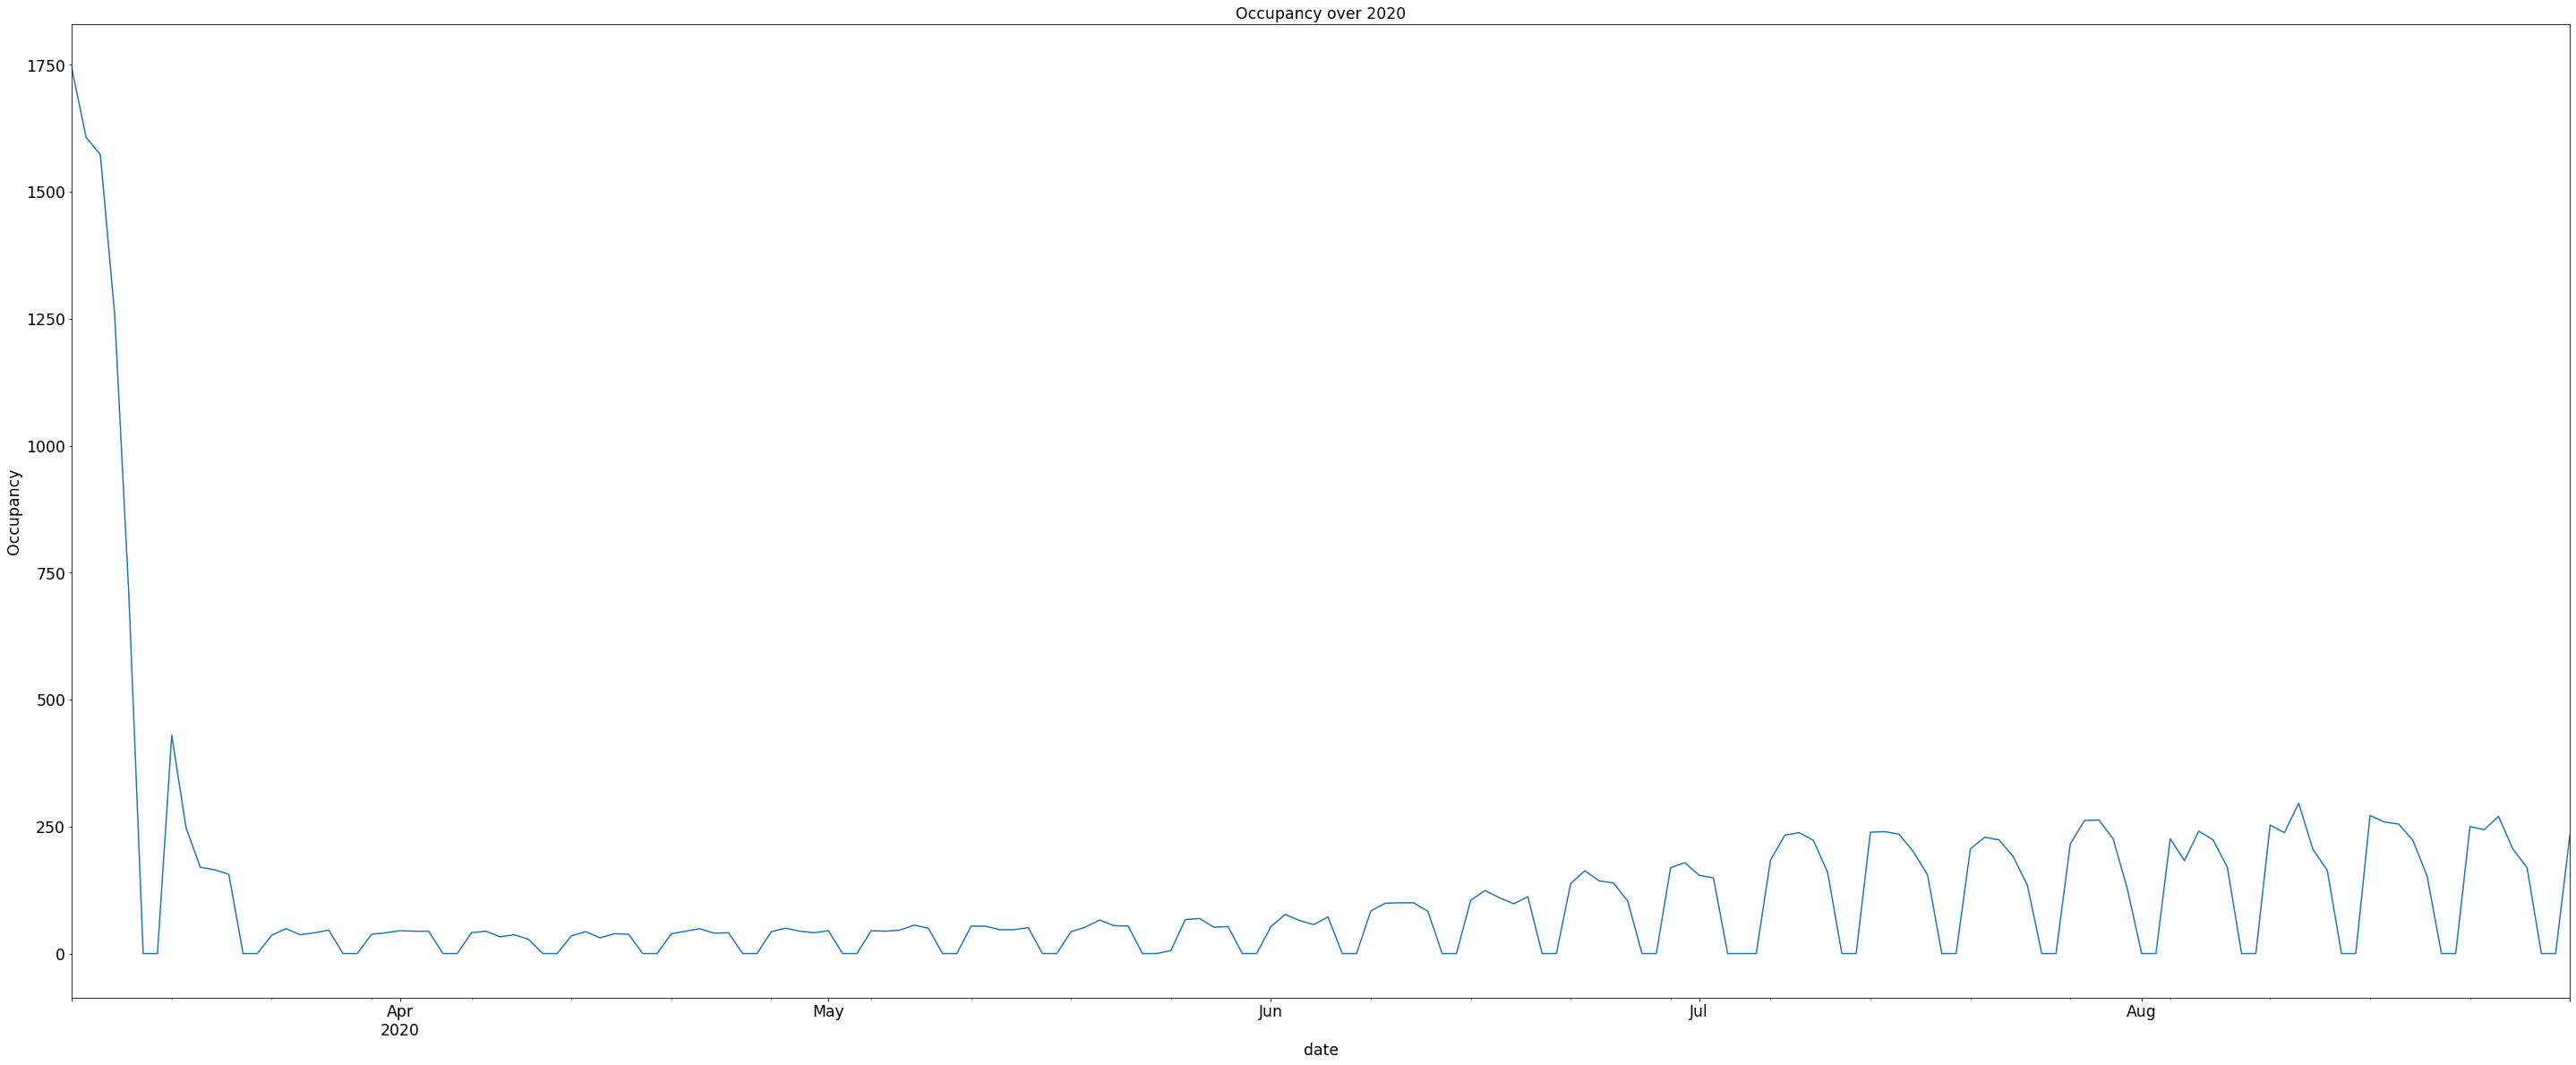

In [27]:
o = pd.read_csv('Data/Occupancy.csv')
o['date'] = pd.to_datetime(o['date'])
o = o.set_index('date')
o.index = o.index.to_period('D')
o = o.resample('D').sum().fillna(0)
o = o.loc['2020-03-09':]
o = o.loc[:'2020-08-31']
fig, ax = plt.subplots(figsize=(50, 20))
plt.xlabel('Year 2020')
plt.ylabel('Occupancy')
plt.title('Occupancy over 2020')
o['entries'].plot()
plt.savefig('Occupancy2020.png')
#Checking the occupancy

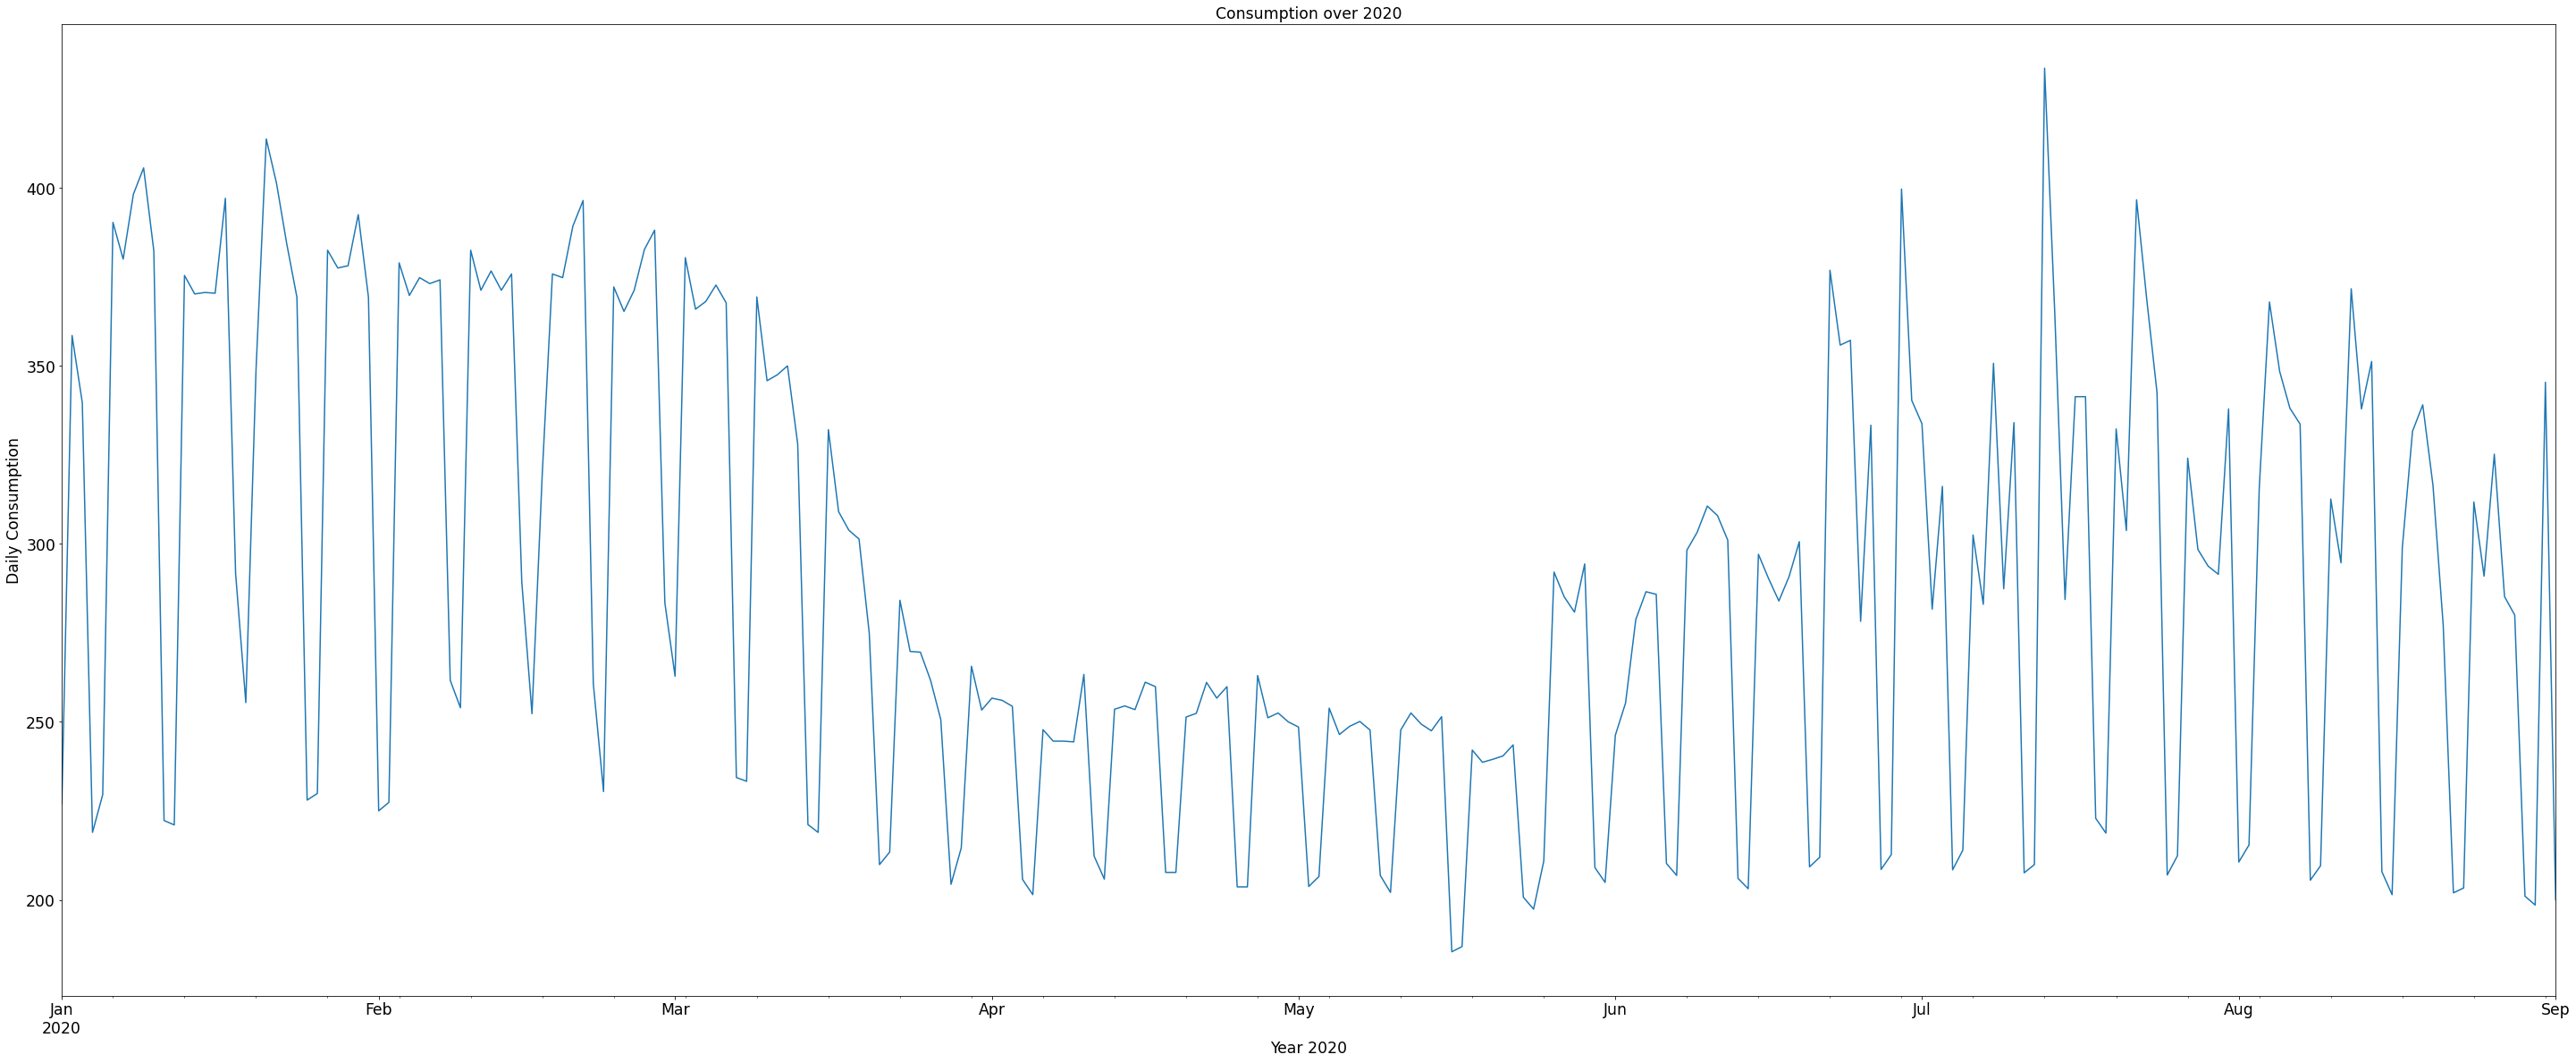

In [33]:
f = e[['date_time', 'consumption', 'avg_demand', 'temp', 'humidity']]
f = f[f['consumption']<800]
f['date_time'] = pd.to_datetime(e_avg['date_time'])
fmask = f['date_time'].dt.year == int(2020)
ffull = f[fmask]
ffull = ffull.set_index('date_time')
ffull.index = ffull.index.to_period('D')
ffull = ffull.resample('D').mean()
fig, ax = plt.subplots(figsize=(50, 20))
ffull['consumption'].plot()
plt.xlabel('Year 2020')
plt.ylabel('Daily Consumption')
plt.title('Consumption over 2020')
plt.savefig('ConsumptionDaily2020.png')
#Checking to see the differences in data with different datetime parameters. 

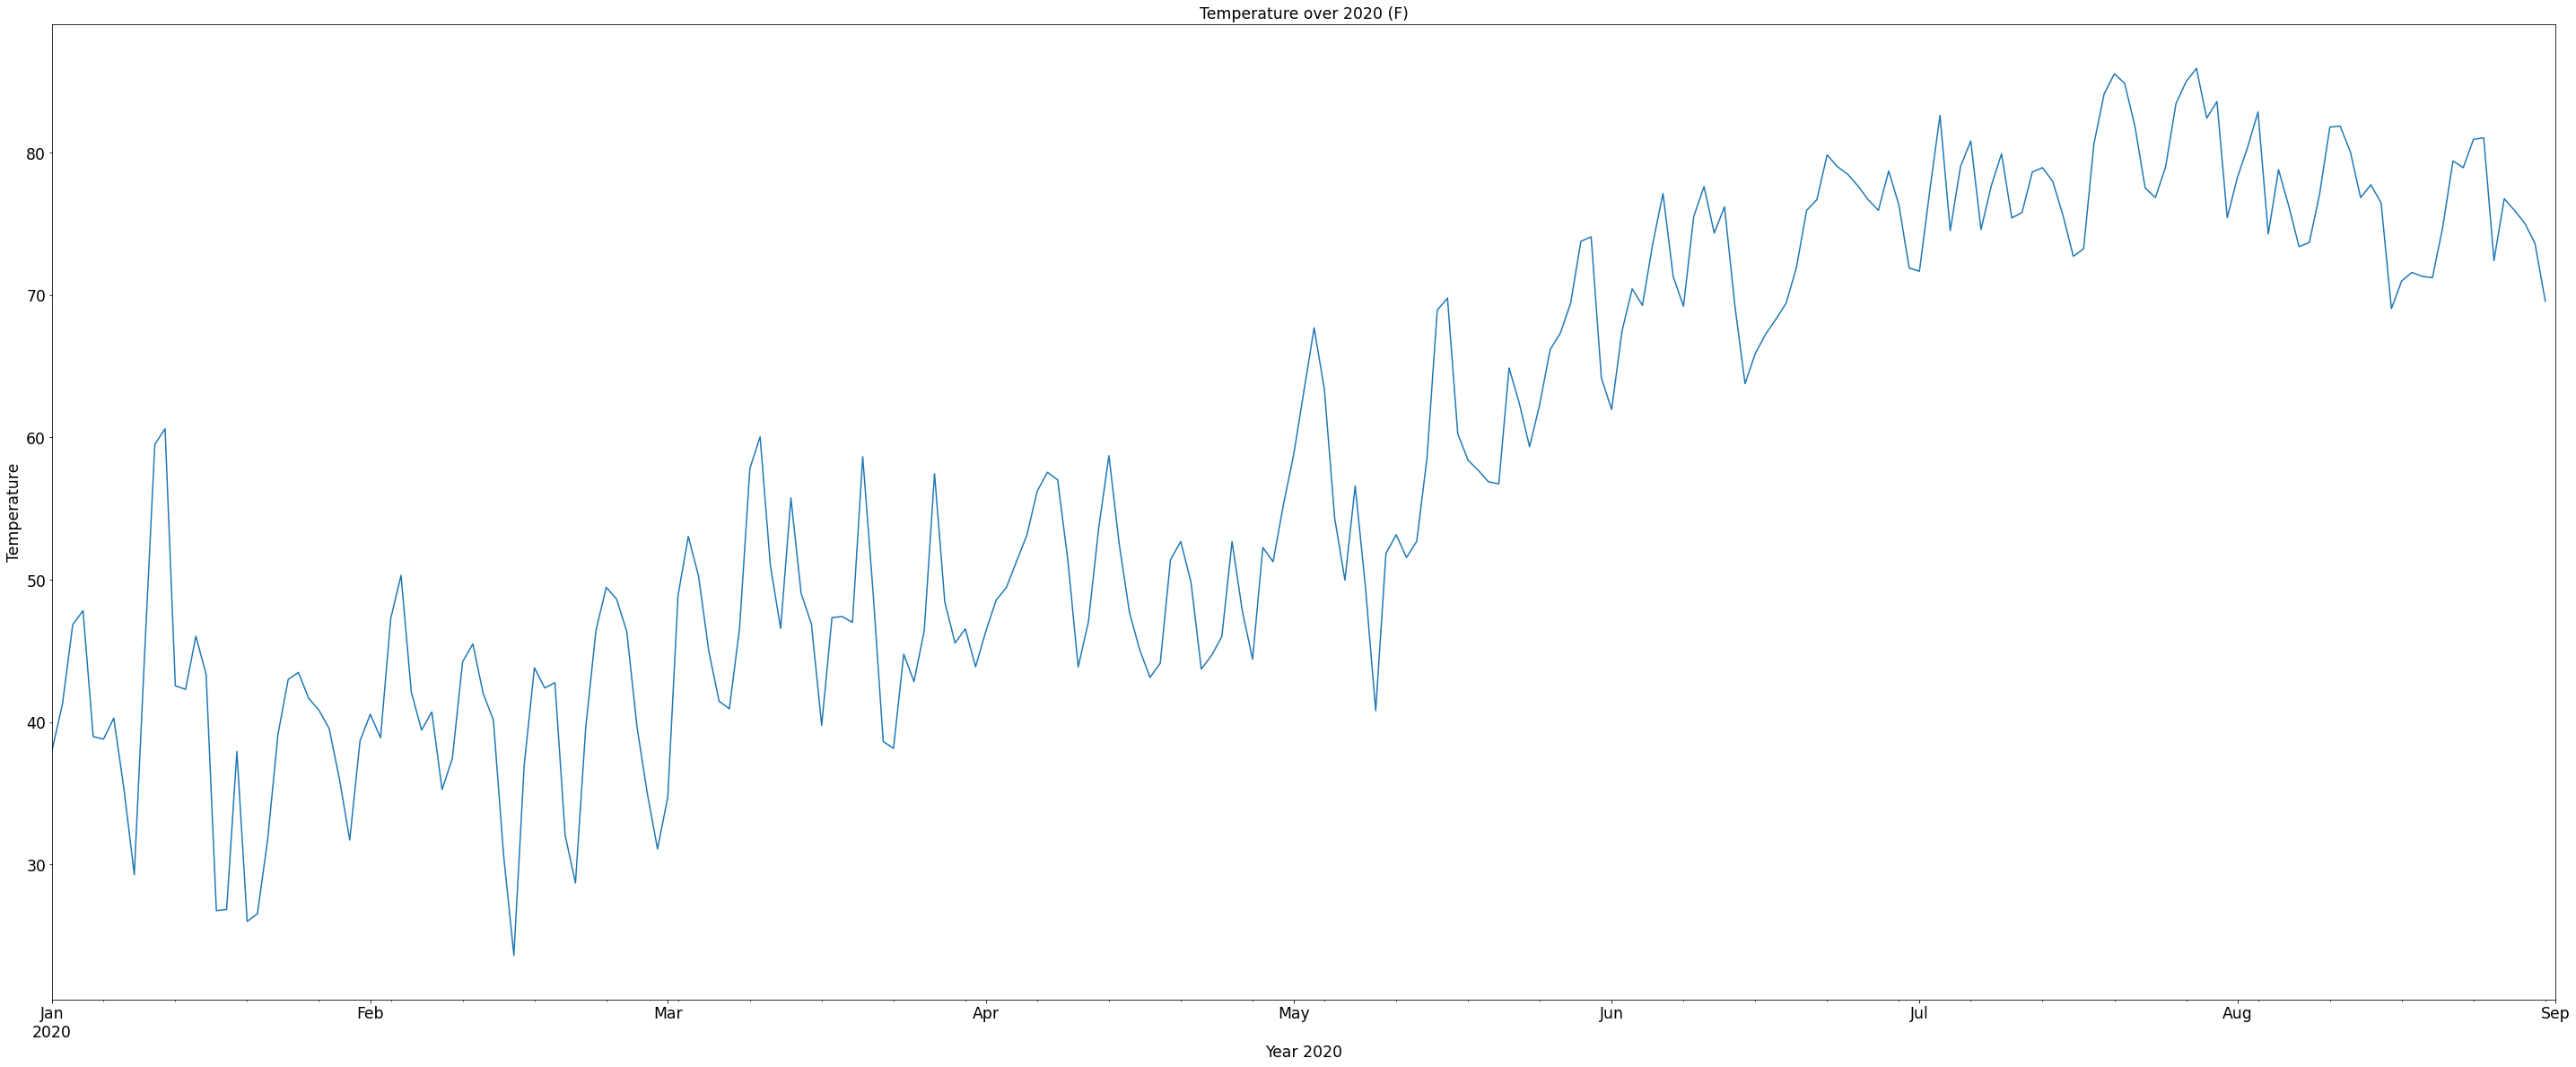

In [34]:
fig, ax = plt.subplots(figsize=(50, 20))
ffull['temp'].plot()
plt.xlabel('Year 2020')
plt.ylabel('Temperature')
plt.title('Temperature over 2020 (F)')
plt.savefig('Temp2020.png')

<AxesSubplot:xlabel='date_time'>

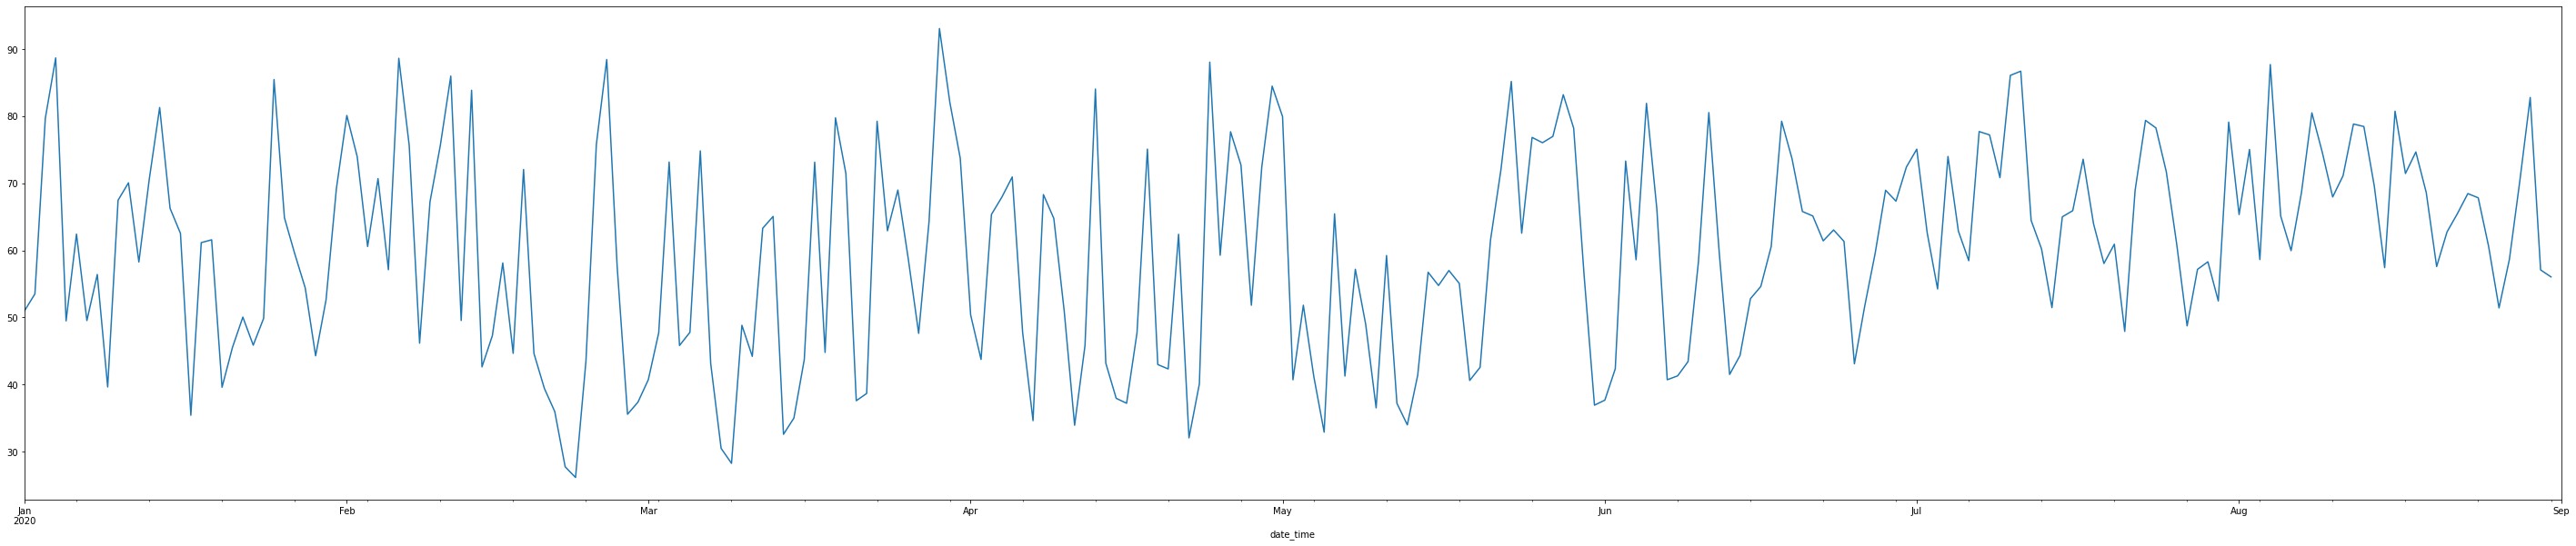

In [66]:
fig, ax = plt.subplots(figsize=(50, 20))
ffull['humidity'].plot()

<AxesSubplot:xlabel='date_time'>

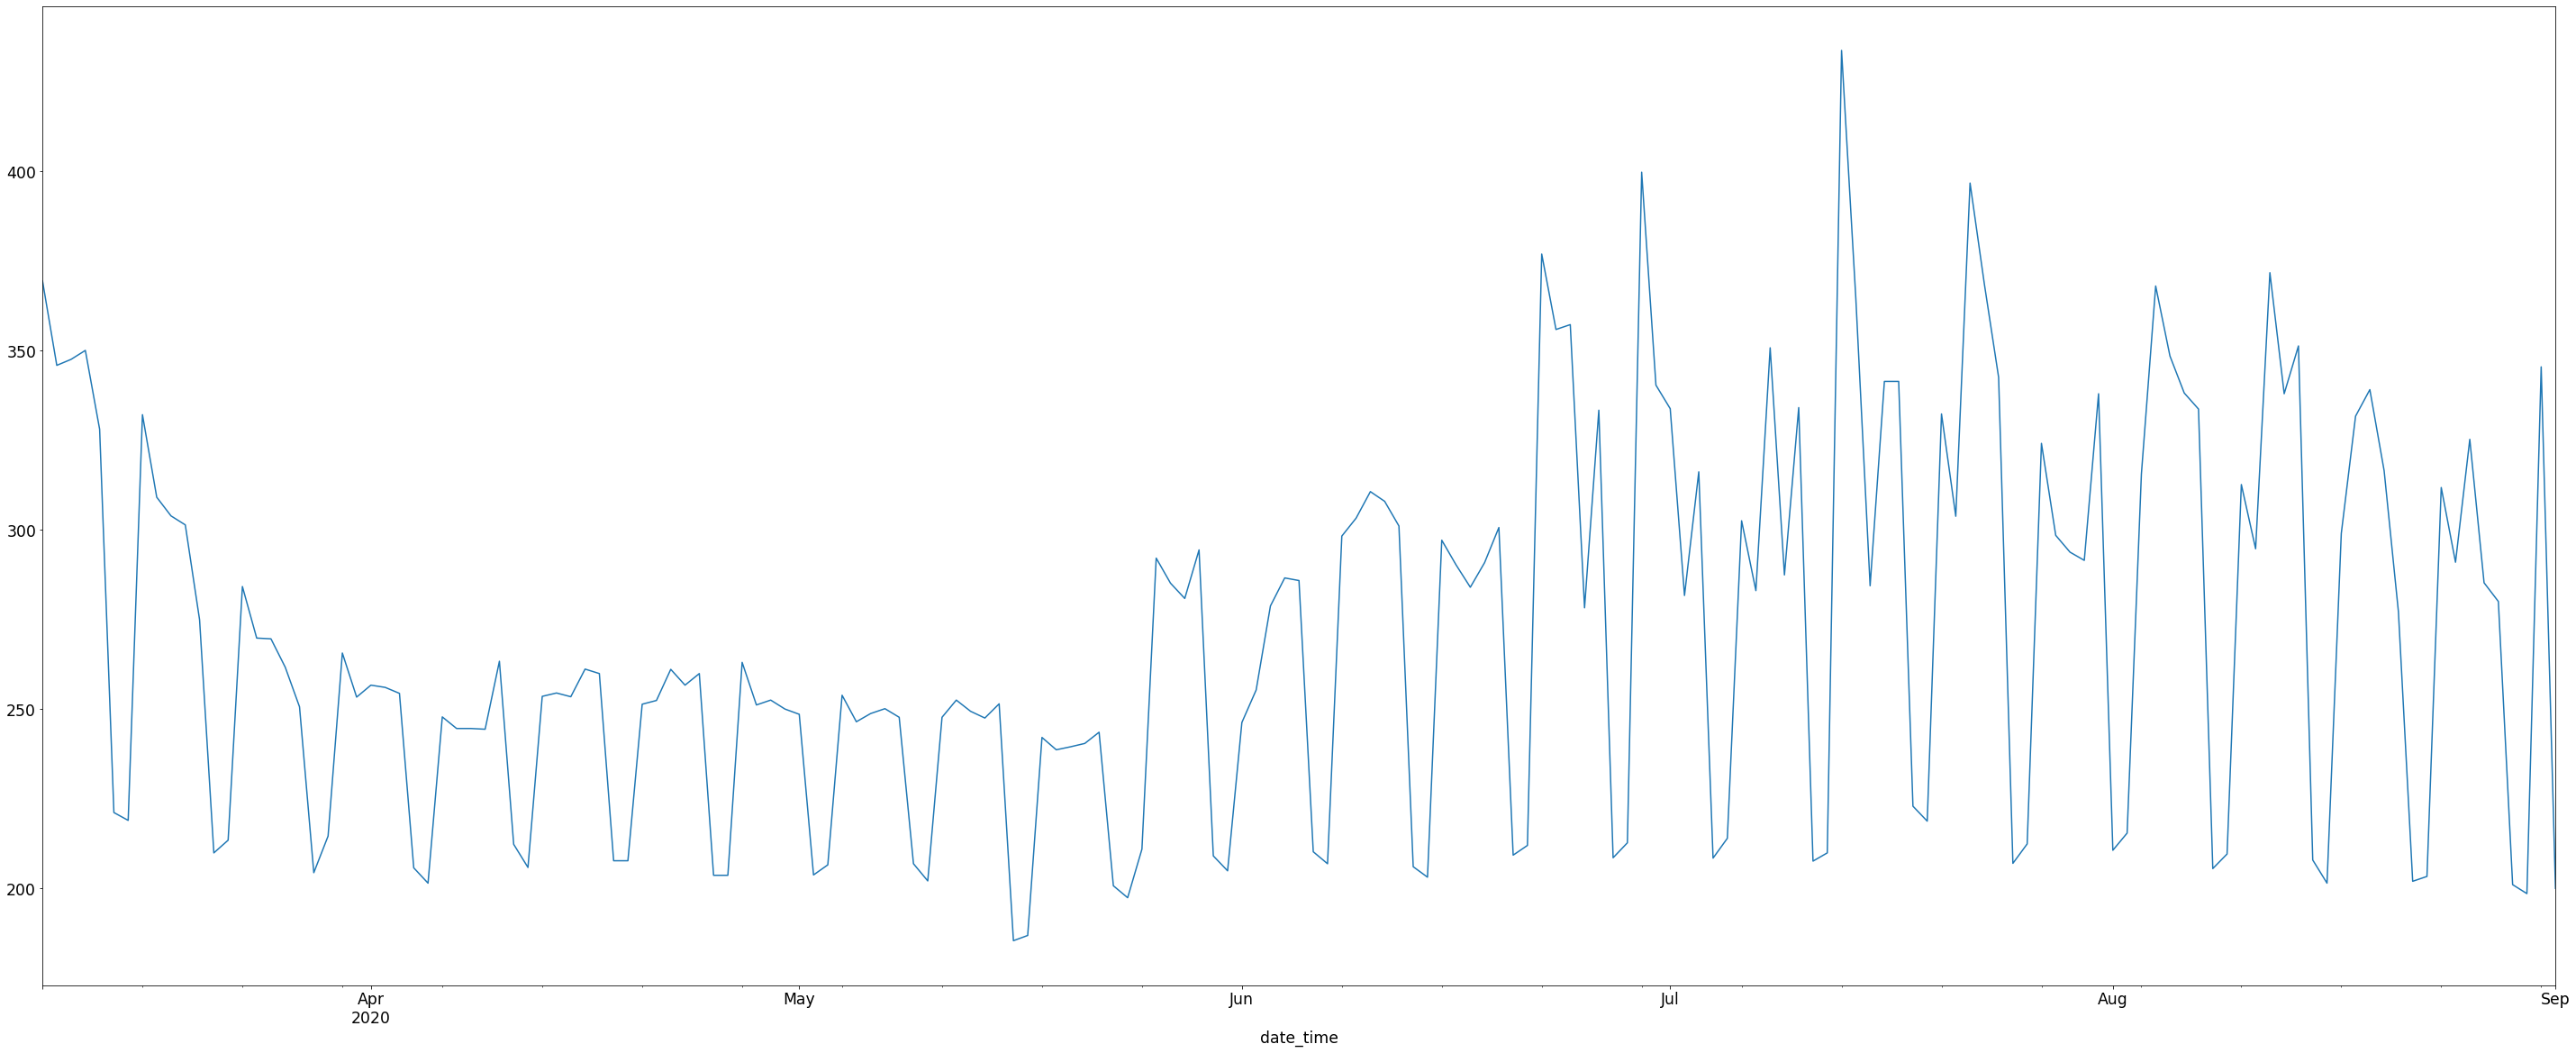

In [30]:
f = e[['date_time', 'consumption', 'avg_demand', 'temp', 'humidity']]
f = f[f['consumption']<800]
f['date_time'] = pd.to_datetime(e_avg['date_time'])
fmask = f['date_time'].dt.year == int(2020)
ffull = f[fmask]
ffull = ffull.set_index('date_time')
ffull.index = ffull.index.to_period('D')
ffull = ffull.resample('D').mean()
ffull = ffull.loc['2020-03-09':]
fig, ax = plt.subplots(figsize=(50, 20))
ffull['consumption'].plot()

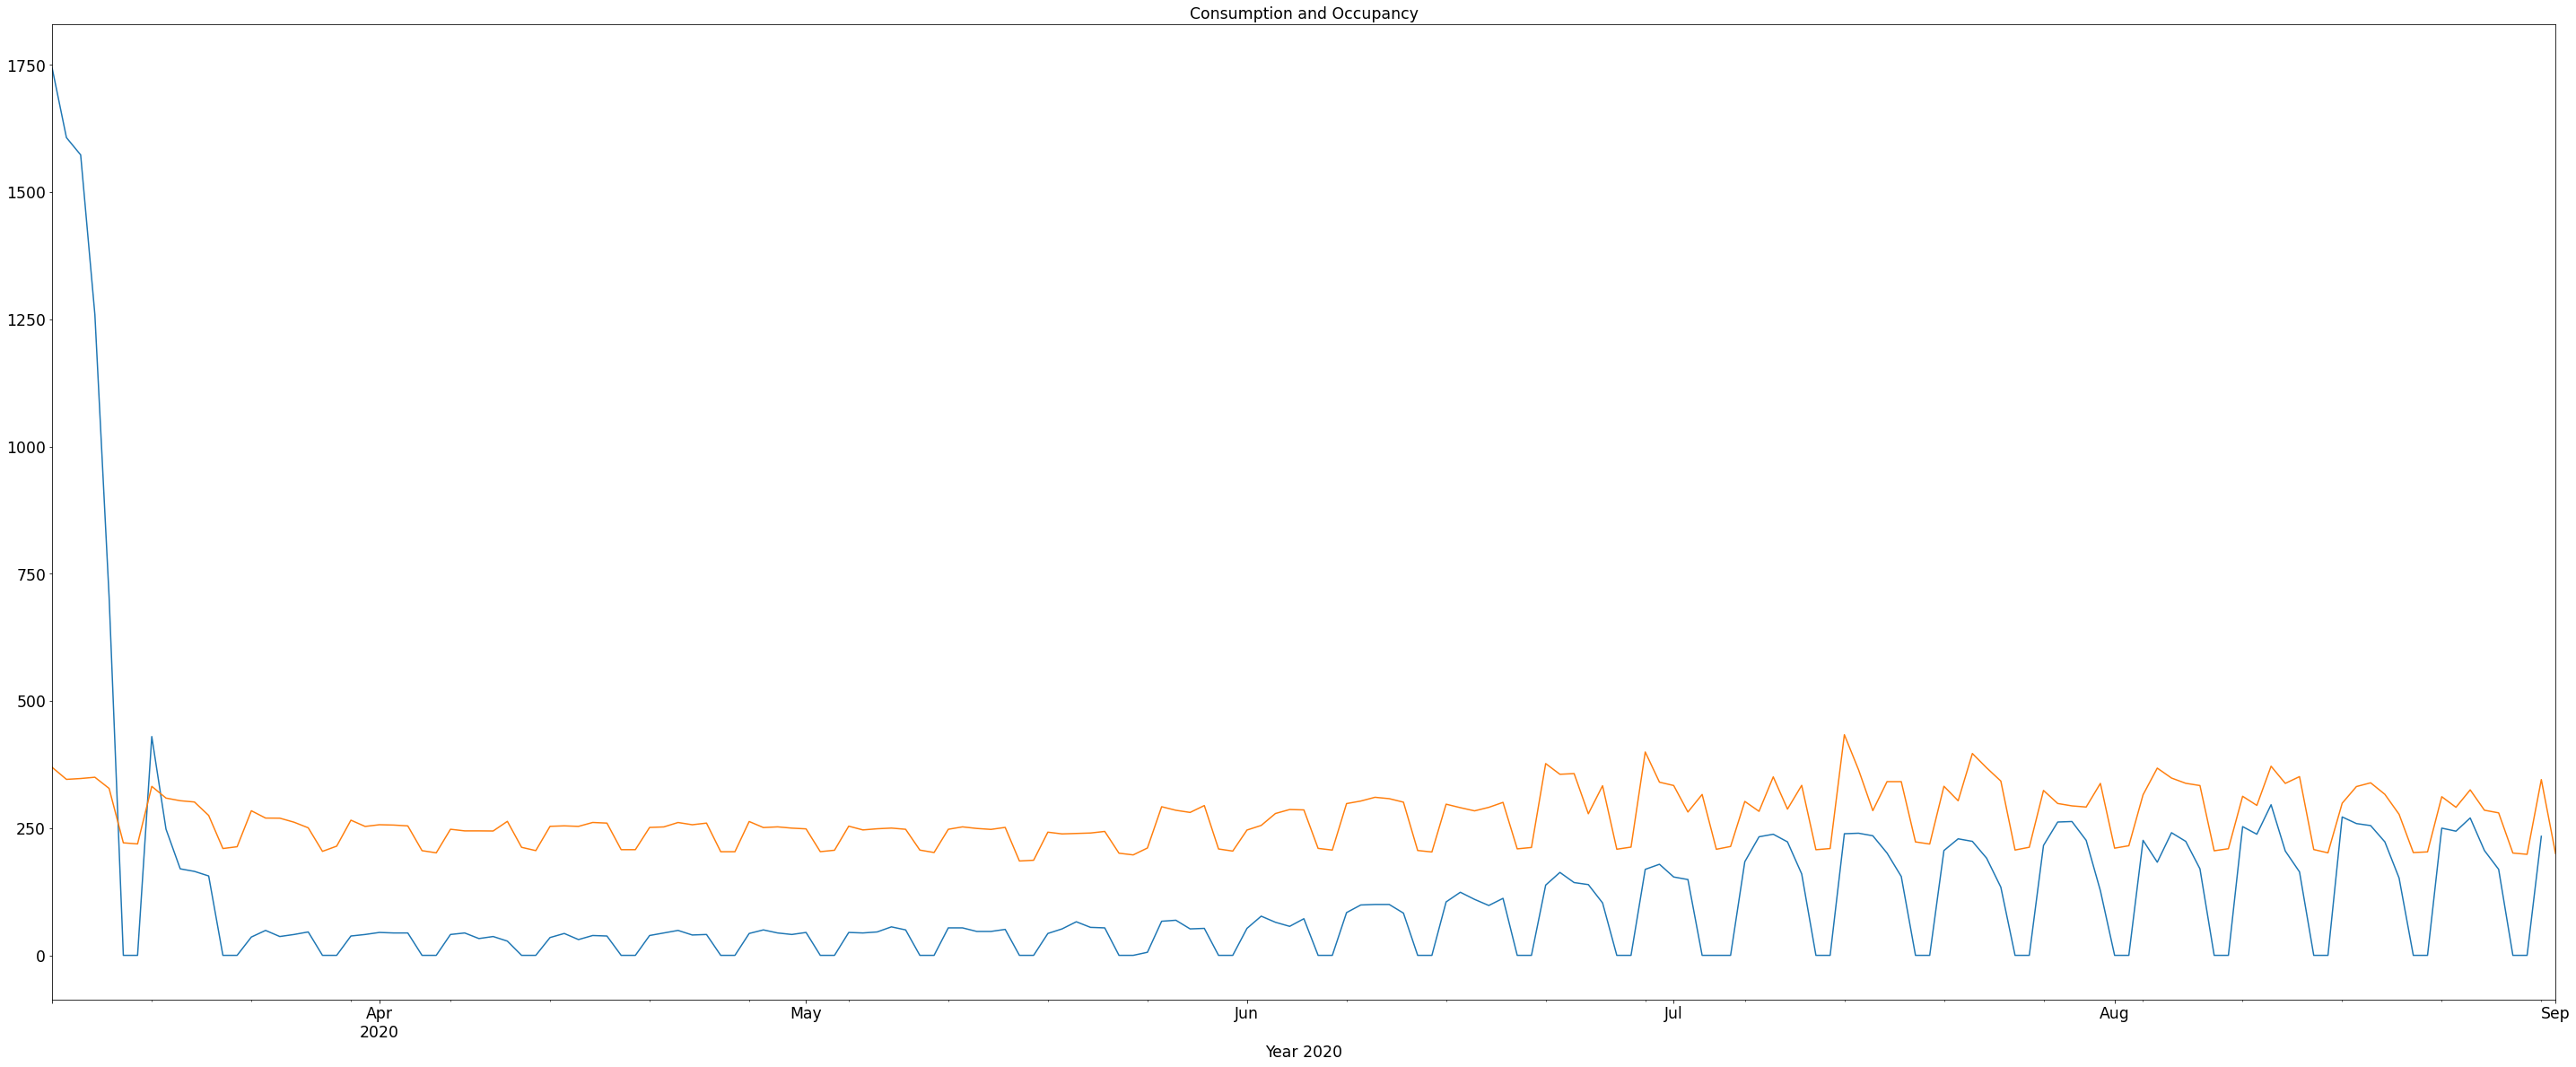

In [32]:
fig, ax = plt.subplots(figsize=(50, 20))
o['entries'].plot()
ffull['consumption'].plot()
plt.xlabel('Year 2020')
plt.title('Consumption and Occupancy')
plt.savefig('Multi2020.png')

In [20]:
of = pd.concat([ffull, o], axis=1).reindex(ffull.index)
of = of.loc[:'2020-08-31']

In [22]:
of.to_csv(r'data/multicon2020.csv')

In [36]:
c = pd.read_csv('ConEd_Electric.csv', parse_dates=True)